# Latar Belakang

TSA (Transportation Security Administration) merupakan sebuah agensi bagian dari Departemen Homeland Security Amerika Serikat yang mempunyai otoritas atas keamanan sistem transportasi domestik maupun international untuk bandara-bandara di Amerika Serikat. TSA Mengembangkan banyak kebijakan-kebijakan untuk melindungi sistem transportasi Amerika Serikat. TSA sendiri dibentuk sebagai respons dari peristiwa 9/11 di Amerika Serikat. TSA bertanggung jawab atas pemeriksaan penumpang dan bagasi pada seluruh bandara di Amerika Serikat. TSA mencatat setiap klaim yang diajukan oleh para pengguna moda transportasi tersebut. Dengan adanya data klaim yang diajukan kepada TSA tersebut, TSA memiliki rekam jejak atas setiap kasus-kasus yang terjadi dan data tersebut dapat digunakan oleh TSA sebagai tolak ukur untuk meningkatkan sistem keamanan serta kinerja dari TSA sendiri.

## Problem Statement

Dengan adanya data klaim tersebut kita ingin mengetahui bandara mana saja yang memiliki jumlah pengajuan klaim terbanyak. Berbagai informasi di dalam dataset dapat membantu TSA dalam mengerucutkan bandara-bandara mana saja yang membutuhkan peningkatan kinerja sistem keamanannya, sehingga dapat mengurangi frekuensi klaim yang diajukan. Sebagai data analyst yang mengulik dataset ini kita akan berusaha menjawab pertanyaan berikut:

`**Bagaimana karakteristik data pengajuan klaim yang dibuat oleh para penumpang?**`

Dari pernyataan masalah di atas, kita akan membedah lebih mendalam kepada beberapa masalah, yaitu:

Kita ingin menggali beberapa informasi mengenai TSA claims di Amerika Serikat dari kurun waktu 2005-2015 sesuai dengan dataset yang kita dapatkan, yaitu: 
- Bagaimana grafik Total Klaim dari tahun 2002-2015?
- Berapa total klaim yang diajukan kepada setiap bandara?
- Bandara mana saja yang menerima klaim paling banyak?
- Tipe klaim apa saja yang paling banyak diajukan di setiap bandara tersebut?
- Dimana saja lokasi yang paling sering terjadi pelaporan klaim di dalam bandara tersebut?
- Jenis Barang apa saja yang akan kemungkinan akan diberikan klaim pembayaran oleh TSA?


## Data

In [540]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind ,f_oneway
import re

import warnings
warnings.filterwarnings("ignore")

In [541]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('tsa_claims.csv',skipinitialspace=True)
#display(df.head(),df.tail())
df

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204262,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other; Clothing,-,-,NaN,NaN
204263,2015123027969,17-Dec-15,2-Dec-15,-,-,-,Property Damage,Checked Baggage,Audio/Video; Home Decor,-,-,NaN,NaN
204264,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN
204265,2016011328300,30-Dec-15,28-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,-,-,NaN,NaN


Dataset ini berisi informasi terkait aktivitas klaim yang diajukan oleh pihak pelapor kepada pihak TSA. Ada 13 kolom di dalam dataset tsa_claims, yaitu:

1.  `Claim Number` : ID unik untuk setiap klaim asuransi
2.  `Date Recieved`: Tanggal diterima pengaduan
3.  `Incident Date` : Kapan Insiden (Kehilangan atau kerusakan barang) terjadi
4.  `Airport Code`: Kode bandara/ID unik tempat terjadinya klaim
5.  `Airport Name`: Nama Bandara tempat klaim terjadi
6.  `Airline Name`: Nama maskapai yang digunakan oleh pelapor
7.  `Claim Type`: Jenis Klaim yang diajukan oleh pelapor 
8.  `Claim Site` : Lokasi Pelapor mengajukan klaim tersebut
9.  `Item` : Jenis barang yang dilaporkan oleh pelapor
10. `Claim Amount`: Nominal biaya ganti rugi yang diajukan oleh pelapor (dalam satuan USD)
11. `Status` : Status laporan klaim setelah diterima dan diproses oleh TSA
12. `Close Amount`: Nominal biaya ganti rugi yang dibayarkan oleh TSA kepada pelapor (dalam satuan USD)
13. `Disposition`: Status akhir dari laporan klaim (final status)



## Data Understanding

Sebelum masuk ke dalam tahap analisis data, kita perlu mengenal dan memahami lebih jauh mengenai dataset yang digunakan dalam proses data understanding. Dari tahapan ini, kita dapat menggali informasi umum data serta anomali-anomali yang terdapat di dalam data. Di mana anomali tersebut perlu kita tangani lebih lanjut dalam tahapan data cleaning. Setiap penanganan data anomali akan disertai dengan justifikasi langkah yang diambil.

In [542]:
# Mencari Anomali
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204267 entries, 0 to 204266
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Claim Number   204267 non-null  object
 1   Date Received  204004 non-null  object
 2   Incident Date  202084 non-null  object
 3   Airport Code   195743 non-null  object
 4   Airport Name   195743 non-null  object
 5   Airline Name   169893 non-null  object
 6   Claim Type     196354 non-null  object
 7   Claim Site     203527 non-null  object
 8   Item           200301 non-null  object
 9   Claim Amount   200224 non-null  object
 10  Status         204262 non-null  object
 11  Close Amount   135315 non-null  object
 12  Disposition    131359 non-null  object
dtypes: object(13)
memory usage: 20.3+ MB


In [543]:
df.describe(include='object')

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,204267,204004,202084,195743,195743,169893,196354,203527,200301,200224,204262,135315,131359
unique,204258,4007,26807,465,484,318,11,6,4704,36117,15,17162,3
top,2013121110011,5-Dec-03,12/27/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,682,144,9596,9232,17553,117868,159753,36908,28445,68339,71546,68382


## Missing Value

In [544]:
df.isna().sum()

Claim Number     0    
Date Received    263  
Incident Date    2183 
Airport Code     8524 
Airport Name     8524 
Airline Name     34374
Claim Type       7913 
Claim Site       740  
Item             3966 
Claim Amount     4043 
Status           5    
Close Amount     68952
Disposition      72908
dtype: int64

## Check Duplicates

In [545]:
df[df.duplicated(keep=False)]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
16841,2004050450432,26-Sep-03,9/13/2003 0:00,NaN,NaN,NaN,Property Damage,Checked Baggage,DVD/CD Players,$31.96,Canceled,NaN,NaN
16842,2004050450432,26-Sep-03,9/13/2003 0:00,NaN,NaN,NaN,Property Damage,Checked Baggage,DVD/CD Players,$31.96,Canceled,NaN,NaN


In [546]:
df = df.drop_duplicates()
df.shape

(204266, 13)

In [547]:
pd.set_option('display.max_colwidth', -1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

Column Name  Number of Unique  \
0   Claim Number   204258             
1   Date Received  4007               
2   Incident Date  26807              
3   Airport Code   465                
4   Airport Name   484                
5   Airline Name   318                
6   Claim Type     11                 
7   Claim Site     6                  
8   Item           4704               
9   Claim Amount   36117              
10  Status         15                 
11  Close Amount   17162              
12  Disposition    3                  

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

Secara umum, kita bisa melihat bahwa:
* dataset `tsa_claims` memiliki 13 columns dan 204267 row
* Semua data didalam dataset memiliki datatype object
* terdapat dua row duplikat yang sudah kita drop di awal penjelasan.
* Semua kolom memiliki nilai NaN, kecuali kolom `Claim Number`
* kolom `Claim Number` berisikan id unik untuk setiap claim, karena tidak relevan dengan analisis, kita bisa menghapus kolom tersebut.
* kolom `Date Recieved` dan `Incident Date` yang berisikan tipe data object, tidak sesuai dengan isinya yang merujuk kepada tanggal/waktu atau tipe data DateTime. Maka dari itu bisa kita ubah tipe datanya.
* Terdapat beberapa duplikat value di kolom `Airport Name`, dimana value tersebut berkorelasi dengan value yang sama di kolom `Airport Code`. 
* kolom `Claim Amount`  dan `Close Amount` yang memiliki data tipe object, seharusnya berisikan data numerik, karena menjelaskan nominal dari penjelasannya.
* harus dilakukan analisa lebih lanjut pada kolom `Airline Name` karena ada beberapa value yang memiliki kemiripan dalam penulisan
* kolom `item` berisikan jenis barang yang dilaporkan dimana kita bisa analisa lebih lanjut

## Missing Value

In [548]:
df.isna().sum()

Claim Number     0    
Date Received    263  
Incident Date    2183 
Airport Code     8523 
Airport Name     8523 
Airline Name     34373
Claim Type       7913 
Claim Site       740  
Item             3966 
Claim Amount     4043 
Status           5    
Close Amount     68951
Disposition      72907
dtype: int64

In [549]:
(df.isna().sum()/len(df)*100).sort_values(ascending=False)

Disposition      35.692186
Close Amount     33.755495
Airline Name     16.827568
Airport Code     4.172501 
Airport Name     4.172501 
Claim Type       3.873870 
Claim Amount     1.979282 
Item             1.941586 
Incident Date    1.068705 
Claim Site       0.362273 
Date Received    0.128754 
Status           0.002448 
Claim Number     0.000000 
dtype: float64

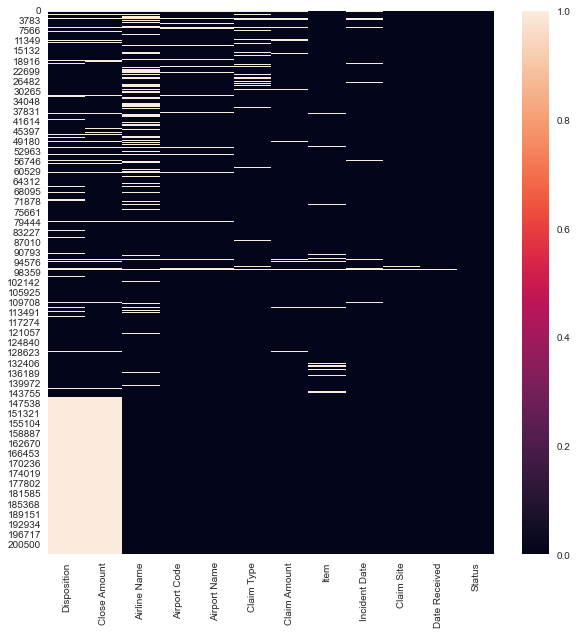

In [550]:
plt.figure(figsize=(10,10))
sns.heatmap(df[['Disposition','Close Amount','Airline Name','Airport Code',\
    'Airport Name','Claim Type','Claim Amount','Item','Incident Date','Claim Site','Date Received','Status']].isna());

Secara garis besar:  
* *missing value* di kolom `close amount`, dan `disposition` memiliki persentase yang cukup tinggi (35.7% dan 33.7%) serta terdapat keunikan karena missing value terdapat secara siginifikan
di sekitar baris ke 147 ribu.
* *missing value* di `Airline Name` juga memilik persentase yang cukup tinggi (16.82%) yang dimana kolom tersebut merupakan nama maskapai yang digunakan pelapor (seharusnya pelapor menaiki sebuah maskapai)
yang dimana akan kita bahas lebih lanjut
* Karena data kolom `Close Amount` dan `Disposition` tidak relevan dengan tujuan analysis, kita bisa hapus dua kolom tersebut

Ada 2 cara untuk menangani *Missing Value*:
* pertama, menghapus baris/kolom yang berisi *missing value*.
* kedua, mengisi data yang hilang. Cara ini lebih disarankan. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, 
cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. 
Dalam kasus ini, kita akan mencoba mengisi *missing value* berdasarkan kolom lain yang secara domain knowledge atau secara statistik berkaitan dengan kolom yang memiliki *missing value*. 
Jika masih ada kolom yang tidak bisa diisi, barulah kita mengisi dengan angka *mean, median* atau *modus*. Menghapus data akan menjadi opsi terakhir.

## Data Cleaning

## `Date Recieved` and `Incident Date`

Datatype pada kolom `Date Recieved` dan `Incident Date` memiliki tipe data object. Namun tipe data tersebut tidak sesuai dengan penjelasan value di dalamnya yang menjelaskan waktu. Maka akan kita ubah tipe datanya menjadi Date Time

In [551]:
df['Date Received'] = pd.to_datetime(df['Date Received'])
df['Incident Date'] = pd.to_datetime(df['Incident Date'],errors='coerce')

In [552]:
df['Date Received'].dt.year.value_counts().sort_index()

1994.0    1    
1996.0    1    
2000.0    4    
2002.0    1054 
2003.0    22473
2004.0    29786
2005.0    24548
2006.0    19093
2007.0    18672
2008.0    16440
2009.0    12803
2010.0    10925
2011.0    10905
2012.0    10069
2013.0    9698 
2014.0    8855 
2015.0    8667 
2020.0    1    
2025.0    5    
2040.0    1    
2044.0    1    
2055.0    1    
Name: Date Received, dtype: int64

In [553]:
df['Incident Date'].dt.year.value_counts().sort_index()

1996.0    1    
2000.0    14   
2001.0    15   
2002.0    2156 
2003.0    24507
2004.0    28960
2005.0    22965
2006.0    18806
2007.0    18270
2008.0    15902
2009.0    11179
2010.0    12215
2011.0    10995
2012.0    9997 
2013.0    9536 
2014.0    8680 
2015.0    7721 
Name: Incident Date, dtype: int64

In [554]:
# Mengatur rentang tahun data yang digunakan sesuai dengan informasi tentang rentang tahun dataset (2002-2015)

df = df[df['Date Received'].dt.year.isin(range(2002,2015+1))]
df = df[df['Incident Date'].dt.year.isin(range(2002,2015+1))]

In [555]:
# Menghapus setiap index data dengan kondisi waktu 'Incident Date' lebih baru dibanding waktu 'Date Received'

indeks = df[df['Incident Date'] > df['Date Received']].index
df.drop(index=indeks, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Checkpoint,Clothing - Shoes; belts; accessories; etc.,$75.00,Approved,$75.00,Approve in Full
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN
2,2004102965797,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,NaN,Passenger Property Loss,Checkpoint,Jewelry - Fine,$4;457.29,Denied,NaN,Deny
3,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Checkpoint,Eyeglasses - (including contact lenses),$16.71,Approved,$17.00,Approve in Full
4,13334,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Other,Clothing - Shoes; belts; accessories; etc.,$450.00,Canceled,NaN,NaN


In [556]:
df.shape

(200025, 13)

In [557]:
df.isna().sum().sort_values(ascending=False)

Disposition      71010
Close Amount     67344
Airline Name     32027
Airport Code     6939 
Airport Name     6939 
Claim Type       6327 
Item             3683 
Claim Amount     2501 
Claim Site       515  
Claim Number     0    
Date Received    0    
Incident Date    0    
Status           0    
dtype: int64

In [558]:
df.isna().sum()/df.shape[0]*100

Claim Number     0.000000 
Date Received    0.000000 
Incident Date    0.000000 
Airport Code     3.469066 
Airport Name     3.469066 
Airline Name     16.011499
Claim Type       3.163105 
Claim Site       0.257468 
Item             1.841270 
Claim Amount     1.250344 
Status           0.000000 
Close Amount     33.667792
Disposition      35.500562
dtype: float64

## `Claim Type` dan `Claim Site`

Kita akan meng-impute NaN values dari Claim Type dan Claim Site dengan 'Other'

In [559]:
df[['Claim Type', 'Claim Site']] = df[['Claim Type', 'Claim Site']].fillna('Other')

In [560]:
df[['Claim Type', 'Claim Site']].isna().sum()

Claim Type    0
Claim Site    0
dtype: int64

In [561]:
df['Claim Type'].value_counts()

Passenger Property Loss    116386
Property Damage            74231 
Other                      6327  
Personal Injury            1456  
Employee Loss (MPCECA)     477   
Passenger Theft            451   
Motor Vehicle              368   
-                          274   
Complaint                  47    
Wrongful Death             4     
Compliment                 3     
Bus Terminal               1     
Name: Claim Type, dtype: int64

Lalu kita impute lagi `Claim Type` dan `Claim Site` yang berupa '-' dengan 'Other'

In [562]:
df.loc[df['Claim Type'] =='-', 'Claim Type'] = 'Other'

In [563]:
df['Claim Type'].value_counts()

Passenger Property Loss    116386
Property Damage            74231 
Other                      6601  
Personal Injury            1456  
Employee Loss (MPCECA)     477   
Passenger Theft            451   
Motor Vehicle              368   
Complaint                  47    
Wrongful Death             4     
Compliment                 3     
Bus Terminal               1     
Name: Claim Type, dtype: int64

In [564]:
df['Claim Site'].value_counts()

Checked Baggage    157557
Checkpoint         39537 
Other              2178  
Motor Vehicle      472   
-                  265   
Bus Station        16    
Name: Claim Site, dtype: int64

In [565]:
df.loc[df['Claim Site'] =='-', 'Claim Site'] = 'Other'

In [566]:
df['Claim Site'].value_counts()

Checked Baggage    157557
Checkpoint         39537 
Other              2443  
Motor Vehicle      472   
Bus Station        16    
Name: Claim Site, dtype: int64

In [567]:
df.isna().sum()/df.shape[0]*100

Claim Number     0.000000 
Date Received    0.000000 
Incident Date    0.000000 
Airport Code     3.469066 
Airport Name     3.469066 
Airline Name     16.011499
Claim Type       0.000000 
Claim Site       0.000000 
Item             1.841270 
Claim Amount     1.250344 
Status           0.000000 
Close Amount     33.667792
Disposition      35.500562
dtype: float64

In [568]:
# df.loc[df['Claim Type'] =='-', 'Claim Type'] = 'Other'

In [569]:
# df['Claim Type'].value_counts()

In [570]:
# df['Claim Site'].value_counts()

In [571]:
# df.loc[df['Claim Site']=='-','Claim Site']= 'Other'

In [572]:
# df['Claim Site'].value_counts()

In [573]:
# df.isna().sum()/df.shape[0]*100

## Airport Code dan Airport Name

Kolom Airport Code dan Aiport Name seharusnya adalah dua kolom yang ber hubungan, dimana satu `Airport Code` seharusnya hanya memiliki satu nama `Airport Name` seperti penjabaran di bawah ini

In [574]:
temp_APcode = df.groupby('Airport Code')['Airport Name'].nunique().sort_values(ascending=False)

print(df[df['Airport Code'].isin(temp_APcode[temp_APcode>1].index)].groupby('Airport Code')['Airport Name'].unique())
print(len(df[df['Airport Code'].isin(temp_APcode[temp_APcode>1].index)].groupby('Airport Code')['Airport Name'].unique()))

Airport Code
BOS    [Boston (Logan) International Airport, Boston (Logan) International Airport ]      
BUR    [Bob Hope, Bob Hope ]                                                              
BZN    [Gallatin Field, Bozeman Yellowstone International Airport]                        
DEN    [Denver International Airport, Denver International Airport ]                      
DFW    [Dallas-Fort Worth International Airport, Dallas-Fort Worth International Airport ]
DUJ    [Dubois Jefferson County, Dubois Jefferson County ]                                
EAR    [Kearney Municipal Airport, Kearney Municipal Airport ]                            
HIB    [Chisolm-Hibbing Municipal, Chisolm-Hibbing Municipal ]                            
INL    [Falls International, Falls International ]                                        
JHM    [Kapalua Airport, Kapalua Airport ]                                                
LAX    [Los Angeles International Airport, Los Angeles International Airport 

Maka dari itu kita akan betulkan `Airport Code` yang memiliki `Airport Name` lebih dari satu atau yang disinyalir memiliki whitespace, sehingga kita lakukan operasi berikut

In [575]:
df['Airport Code'] = df['Airport Code'].str.strip()
df['Airport Name'] = df['Airport Name'].str.strip()

#Karena Airport Code 'PNS' memiliki dua 'airport name'
df['Airport Name'] = df['Airport Name'].replace(to_replace='Pensacola Regional',value='Pensacola International Airport')
df['Airport Name'] = df['Airport Name'].replace(to_replace='Gallatin Field',value='Bozeman Yellowstone International Airport')

In [576]:
df['Airline Name'].nunique()

318

Setelah sudah kita ubah, maka kita bisa drop semua NaN value pada `Airport Code` dan `Airport Name`

In [577]:
df.dropna(subset=['Airport Code', 'Airport Name'], inplace=True)

In [578]:
df[['Airport Code', 'Airport Name']].isna().sum()

Airport Code    0
Airport Name    0
dtype: int64

Kita sudah tidak memiliki NaN values pada `Airport Code` dan `Airport Name`

## `Airline Name`

Kita masih memiliki beberapa nilai NaN pada `Airline Names` sekitar 16% maka kita akan lihat semua unique value pada kolom nama maskapai tersebut

In [579]:
df['Airline Name'].unique()#list

array(['Southwest Airlines', nan, 'American Airlines', 'Delta Air Lines',
       'America West', 'Continental Airlines', 'USAir', 'UAL',
       'Virgin Atlantic', 'Jet Blue', 'Northwest Airlines',
       'Alaska Airlines', 'AirTran Airlines', 'Spirit Airlines',
       'Frontier Airlines', 'American West', 'Air Canada',
       'British Airways', 'America Trans Air', 'Aero Mexico',
       'Hawaiian Airlines', 'Lufthansa', 'Lan Airlines', 'Aloha Airlines',
       'Midwest Express Airlines', 'Qantus Airways',
       'Frontier Aviation Inc', 'Korean Airlines', 'Air Jamaica',
       'KLM Royal Dutch Airlines', 'Alitalia', 'Air France', 'Aer Lingus',
       'Air Tran Airlines(do not use)', 'Japan Airlines', 'Comair Inc',
       'ATA Aerocondor', 'Singapore Airlines', 'Mexicana', 'Swiss Air',
       'Aero Flot', 'Sun Country Airlines Inc',
       'Air 2000 Ltd Great Britain', 'Horizon Air',
       'Skywest Airlines Inc USA', 'Allegiant Air', 'TWA',
       'American Eagle', 'Delta (Song)', 'Sou

Setelah kita telaah terdapat unique value yang berisikan '-' serta NaN, juga kita patut mengindikasikan adanya whitespace pada masing-masing unique value di `Airline Names` maka kita akan proses hal tersebut. NaN values dan '-' akan kita isi dengan nama 'Undisclosed' karena ada asumsi pelapor tidak menyertakan nama maskapai pada saat pelaporan

In [580]:
# Menghapus whitespace di Nama Maskapai
df['Airline Name'] = df['Airline Name'].str.strip().str.replace(' ','')

In [581]:
#Mengisi missing value Airline Name dengan kategori Undisclosed

df['Airline Name'] = df['Airline Name'].fillna('Undisclosed')

In [582]:
# Mengganti value '-' di Airline Name dengan 'Undisclosed
df.loc[df['Airline Name'] == '-', 'Airline Name']='Undisclosed'

In [583]:
df['Airline Name'].isna().sum()

0

In [584]:
df.isna().sum()

Claim Number     0    
Date Received    0    
Incident Date    0    
Airport Code     0    
Airport Name     0    
Airline Name     0    
Claim Type       0    
Claim Site       0    
Item             3487 
Claim Amount     2004 
Status           0    
Close Amount     64378
Disposition      67832
dtype: int64

## Item

Pada kolom item kita akan melakukan hal yang sama mengimpute missing value dengan value lain. Sebelum kita lakukan kita akan lihat unique value terlebih dahulu.

In [585]:
df['Item'].unique()

array(['Clothing - Shoes; belts; accessories; etc.', 'Computer - Laptop',
       'Jewelry - Fine', ...,
       'Baggage/Cases/Purses; Musical Instruments & Accessories; Musical Instruments & Accessories',
       'Clothing; Clothing; Hunting & Fishing Items; Sporting Equipment & Supplies',
       'Cameras; Clothing; Clothing; Clothing; Clothing; Jewelry & Watches; Jewelry & Watches'],
      dtype=object)

Setelah kita observasi, terdapat penjelasan missing value yang berulang dan tidak perlu dan penjelasan yang tidak penting, seperti: 'Clothing','Clothing-shoes','Shoes','Barber'dan 'Barber Supplies' yang sebenarnya merupakan jenis barang yang sama. Maka akan kita sederhanakan dengan mengambil kata pertama pada setiap unique value

In [586]:
df['Item'].nunique()

4662

In [587]:
# Menghapus Whitespace
df['Item'].str.strip()

0         Clothing - Shoes; belts; accessories; etc.              
1         Computer - Laptop                                       
2         Jewelry - Fine                                          
3         Eyeglasses - (including contact lenses)                 
4         Clothing - Shoes; belts; accessories; etc.              
                             ...                                  
200020    Baggage/Cases/Purses; Books; Magazines & Other; Clothing
200021    Audio/Video; Home Decor                                 
200022    Clothing                                                
200023    Tools & Home Improvement Supplies                       
200024    Personal Accessories                                    
Name: Item, Length: 193086, dtype: object

In [588]:
# Mengambil Kata pertama dari unique value dengan split berdasarkan ' - '
df['Item'] = df['Item'].str.split(' - ',expand=True)[0]

In [589]:
df['Item'].unique()

array(['Clothing', 'Computer', 'Jewelry', ...,
       'Baggage/Cases/Purses; Musical Instruments & Accessories; Musical Instruments & Accessories',
       'Clothing; Clothing; Hunting & Fishing Items; Sporting Equipment & Supplies',
       'Cameras; Clothing; Clothing; Clothing; Clothing; Jewelry & Watches; Jewelry & Watches'],
      dtype=object)

In [590]:
# Mengambil Kata pertama dari unique value dengan split berdasarkan '; '
df['Item'] = df['Item'].str.split('; ',expand=True)[0]

In [591]:
df['Item'].unique()

array(['Clothing', 'Computer', 'Jewelry', 'Eyeglasses',
       'Luggage (all types including footlockers)', 'Other', 'Currency',
       nan, 'Cell Phones', 'Cameras', 'Cosmetics', 'Baby',
       'Photographic Film', 'PDA', 'DVD/CD Players', 'Locks',
       'Musical Instruments', 'Stereo Items & Accessories', 'Fish/Game',
       'Medicines', 'Automobile Parts', 'Watches', 'Tools', 'Toys',
       'Alcoholic beverages', 'Dental Equipment and Instruments', 'Books',
       'Dishes', 'Hearing Aids', 'Video Recordings (blank & commercial)',
       'Clocks', 'Audio', 'Medical Equipment & Insturments', 'Candles',
       'Camping Equipment & Supplies', 'Bags',
       'Sporting Equipment & Supplies (footballs',
       'Lighting Supplies (globe domes',
       'Paintings and Pictures (including frames', 'Lighters',
       'Game Equipment (poker chips', 'House Keeping Items (mops', 'GPS',
       'Binoculars', 'Brushes', 'Briefcases', 'Barber Supplies',
       'Kitchen Utensils -Pots', 'Knick Knacks 

In [592]:
# Mengambil Kata pertama dari unique value dengan split berdasarkan ' ('
df['Item'] = df['Item'].str.split(' \(',expand=True)[0]

In [593]:
df['Item'].unique()

array(['Clothing', 'Computer', 'Jewelry', 'Eyeglasses', 'Luggage',
       'Other', 'Currency', nan, 'Cell Phones', 'Cameras', 'Cosmetics',
       'Baby', 'Photographic Film', 'PDA', 'DVD/CD Players', 'Locks',
       'Musical Instruments', 'Stereo Items & Accessories', 'Fish/Game',
       'Medicines', 'Automobile Parts', 'Watches', 'Tools', 'Toys',
       'Alcoholic beverages', 'Dental Equipment and Instruments', 'Books',
       'Dishes', 'Hearing Aids', 'Video Recordings', 'Clocks', 'Audio',
       'Medical Equipment & Insturments', 'Candles',
       'Camping Equipment & Supplies', 'Bags',
       'Sporting Equipment & Supplies', 'Lighting Supplies',
       'Paintings and Pictures', 'Lighters', 'Game Equipment',
       'House Keeping Items', 'GPS', 'Binoculars', 'Brushes',
       'Briefcases', 'Barber Supplies', 'Kitchen Utensils -Pots',
       'Knick Knacks', 'Handbags & Purses', 'Bedding', 'Silverplate',
       'MP3 Players-(iPods', 'Firearms', 'Professional Equipment',
       'Bicycl

Kita sudah menyederhanakan semua values pada kolom `Item`
Lalu kita akan isi NaN value dan `'-'` dengan `'Other'` karena, berdasarkan domain knowledge tidak masuk akal jika kita isi berdasarkan dengan modus

In [594]:
df[df['Item'].isna()]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
26,0616726L,2002-09-18,2002-07-28 00:00:00,MDW,Midway International Airport,SouthwestAirlines,Personal Injury,Checkpoint,NaN,$1;000.00,Canceled,$0.00,NaN
49,21013,2002-09-30,2002-09-01 00:00:00,PHL,Philadelphia International Airport,DeltaAirLines,Personal Injury,Other,NaN,$5;000.00,Denied,$0.00,Deny
53,0616802L,2002-10-07,2002-08-07 00:00:00,CMH,Port Columbus International,Undisclosed,Personal Injury,Checkpoint,NaN,NaN,Canceled,$0.00,NaN
62,21111,2002-10-11,2002-04-10 00:00:00,TSA,TSA - Non-Specified Airport,Undisclosed,Motor Vehicle,Motor Vehicle,NaN,$3;080.69,Approved,$3;080.69,Approve in Full
344,28701,2002-11-26,2002-10-05 00:00:00,LEX,Blue Grass ;Lexington,DeltaAirLines,Personal Injury,Checkpoint,NaN,$249.27,Approved,$249.27,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
141091,2010010567165,2009-12-30,2009-10-12 00:00:00,SYR,Syracuse-Hancock International,DeltaAirLines,Passenger Property Loss,Checkpoint,NaN,$689.42,Approved,$689.42,Approve in Full
141101,2009123066912,2009-12-30,2009-12-15 00:00:00,GSO,Piedmont Triad International Airport,DeltaAirLines,Property Damage,Checked Baggage,NaN,$2;300.00,Denied,$0.00,Deny
141113,2010010567143,2009-12-30,2009-12-04 11:55:00,MSP,Minneapolis/ St.Paul International Airport,DeltaAirLines,Property Damage,Checkpoint,NaN,$20.00,Denied,$0.00,Deny
141114,2010010567146,2009-12-30,2009-12-10 06:00:00,DFW,Dallas-Fort Worth International Airport,AmericanAirlines,Property Damage,Checkpoint,NaN,$3;650.00,Denied,$0.00,Deny


In [595]:
df['Item'].replace(['-'],'Others',inplace=True)

In [596]:
# Mengganti Nan Value dengan 'Others'
df['Item'].fillna(value='Others',inplace=True)

In [597]:
df.isna().sum()

Claim Number     0    
Date Received    0    
Incident Date    0    
Airport Code     0    
Airport Name     0    
Airline Name     0    
Claim Type       0    
Claim Site       0    
Item             0    
Claim Amount     2004 
Status           0    
Close Amount     64378
Disposition      67832
dtype: int64

In [598]:
df.shape

(193086, 13)

## `Claim Amount` and `Close Amount`

- Seperti penjelasan di awal, kolom `Claim Amount` dan `Close Amount` memiliki tipe data `object` yang dimana tidak representatif dengan values dua kolom tersebut. Dua kolom ini merupakan nominal uang  yang diajukan oleh pelapor serta nominal uang yang dibayarkan oleh TSA, maka dari itu harus kita ubah ke tipe data `float`

- Kita akan menghapus whitespace, mengubah format uang yang meimiliki logo dollar dan beberapa `;` yang tidak perlu, serta mengubah bentuk datatype Claim Amount dan Close Amount menjadi Float

In [599]:
# Claim Amount
df['Claim Amount'] = df['Claim Amount'].str.strip()
df['Claim Amount'] = df['Claim Amount'].str.replace(';','').str.replace('$','').str.replace('-','0')
df['Claim Amount'] = df['Claim Amount'].astype(float)

In [600]:
# Close Amount
df['Close Amount'] = df['Close Amount'].str.strip()
df['Close Amount'] = df['Close Amount'].str.replace(';','').str.replace('$','').str.replace('-','0')
df['Close Amount'] = df['Close Amount'].astype(float)

In [601]:
df

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,Other,Checkpoint,Clothing,75.00,Approved,75.0,Approve in Full
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,Undisclosed,Property Damage,Checkpoint,Computer,2270.09,Canceled,NaN,NaN
2,2004102965797,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,Undisclosed,Passenger Property Loss,Checkpoint,Jewelry,4457.29,Denied,NaN,Deny
3,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,AmericanAirlines,Other,Checkpoint,Eyeglasses,16.71,Approved,17.0,Approve in Full
4,13334,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,Other,Other,Clothing,450.00,Canceled,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200020,2015120427297,2015-11-20,2015-10-16,-,-,Undisclosed,Property Damage,Checked Baggage,Baggage/Cases/Purses,0.00,-,NaN,NaN
200021,2015123027969,2015-12-17,2015-12-02,-,-,Undisclosed,Property Damage,Checked Baggage,Audio/Video,0.00,-,NaN,NaN
200022,2016010428072,2015-12-22,2015-12-20,-,-,Undisclosed,Passenger Property Loss,Checked Baggage,Clothing,0.00,-,NaN,NaN
200023,2016011328300,2015-12-30,2015-12-28,-,-,Undisclosed,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,0.00,-,NaN,NaN


Semua format sudah terubah, akan tetapi kita masih memiliki nilai NaN yang akan kita selesaikan di akhir, karena cukup banyak proporsi nya serta adanya indikasi kolom yang berhubungan

In [602]:
df['Status'].unique()

array(['Approved', 'Canceled', 'Denied', 'Settled', 'In litigation',
       'Closed as a contractor claim',
       'Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.',
       'In review', 'Claim has been assigned for further investigation',
       'Pending response from claimant', 'Deny', '-', 'Settle',
       'Approve in Full'], dtype=object)

In [603]:
df.loc[df['Status']=='-','Disposition'] = df.loc[df['Status']=='-','Disposition'].fillna('Deny')

In [604]:
df.loc[df['Status']=='-']

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
141162,2010010567177,2010-01-04,2010-01-01 00:00:00,DEN,Denver International Airport,SouthwestAirlines,Passenger Property Loss,Checked Baggage,Clothing,0.0,-,NaN,Deny
141168,2010010767268,2010-01-05,2010-01-02 00:00:00,IAD,Washington Dulles International,UAL,Passenger Property Loss,Checked Baggage,Baggage/Cases/Purses,0.0,-,NaN,Deny
141172,2010010767271,2010-01-06,2010-01-01 00:00:00,CLE,Cleveland Hopkins International,Undisclosed,Passenger Property Loss,Checkpoint,Jewelry & Watches,0.0,-,NaN,Deny
141174,2010010867306,2010-01-06,2010-01-03 00:00:00,ATL,Hartsfield-Jackson Atlanta International Airport,DeltaAirLines,Passenger Property Loss,Checked Baggage,Food & Drink,0.0,-,NaN,Deny
141176,2010010867334,2010-01-06,2010-01-04 12:40:00,BIL,Billings; MT,UAL,Passenger Property Loss,Checkpoint,Currency,0.0,-,NaN,Deny
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200020,2015120427297,2015-11-20,2015-10-16 00:00:00,-,-,Undisclosed,Property Damage,Checked Baggage,Baggage/Cases/Purses,0.0,-,NaN,Deny
200021,2015123027969,2015-12-17,2015-12-02 00:00:00,-,-,Undisclosed,Property Damage,Checked Baggage,Audio/Video,0.0,-,NaN,Deny
200022,2016010428072,2015-12-22,2015-12-20 00:00:00,-,-,Undisclosed,Passenger Property Loss,Checked Baggage,Clothing,0.0,-,NaN,Deny
200023,2016011328300,2015-12-30,2015-12-28 00:00:00,-,-,Undisclosed,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,0.0,-,NaN,Deny


In [605]:
df.shape

(193086, 13)

In [606]:
df['Claim Amount'].isna().sum()

2004

In [607]:
# melihat claim amount yang memili
df.loc[(df['Claim Amount'].isna()) & (df['Status']=='Approved')].index

Int64Index([  698,  2703,  5790,  6050,  6143,  6148,  6236,  6820,  9291,
            10459, 11686, 12726, 12857, 12880, 13415, 14648, 14651, 14873,
            14880, 15504, 15708, 17048, 17898, 18195, 18616, 19383, 19901,
            20478, 20554, 21112, 21601, 21975, 21989, 22028, 22494, 22507,
            22537, 23977, 24453, 24988, 25297, 26633, 26917, 26957, 27464,
            28695, 29611, 29773, 32205, 32541, 32881, 36086, 46359],
           dtype='int64')

In [608]:
df.drop(index=[6148, 13415, 22494, 23977],inplace=True)

In [609]:
df.loc[df['Status']=='-'].index

Int64Index([141162, 141168, 141172, 141174, 141176, 141189, 141198, 141204,
            141207, 141210,
            ...
            200015, 200016, 200017, 200018, 200019, 200020, 200021, 200022,
            200023, 200024],
           dtype='int64', length=12669)

In [610]:
df = df.drop(index=df.loc[df['Status']=='-'].index)
df

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,Other,Checkpoint,Clothing,75.00,Approved,75.0,Approve in Full
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,Undisclosed,Property Damage,Checkpoint,Computer,2270.09,Canceled,NaN,NaN
2,2004102965797,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,Undisclosed,Passenger Property Loss,Checkpoint,Jewelry,4457.29,Denied,NaN,Deny
3,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,AmericanAirlines,Other,Checkpoint,Eyeglasses,16.71,Approved,17.0,Approve in Full
4,13334,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,Other,Other,Clothing,450.00,Canceled,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199947,2015070223650,2015-06-29,2015-05-08,ZZX,Non TSA Airport (motor vehicle),Undisclosed,Employee Loss (MPCECA),Motor Vehicle,Others,250.00,Approve in Full,NaN,NaN
199960,2015092425588,2015-09-10,2015-08-31,ZZX,Non TSA Airport (motor vehicle),Undisclosed,Motor Vehicle,Other,Others,656.56,Approve in Full,NaN,NaN
199961,2015102026116,2015-09-29,2015-09-22,ZZX,Non TSA Airport (motor vehicle),Undisclosed,Motor Vehicle,Motor Vehicle,Others,1520.85,Approve in Full,NaN,NaN
199962,2015101326019,2015-10-13,2015-07-16,ZZX,Non TSA Airport (motor vehicle),Undisclosed,Motor Vehicle,Motor Vehicle,Others,643.32,Approve in Full,NaN,NaN


In [611]:
df.isna().sum()

Claim Number     0    
Date Received    0    
Incident Date    0    
Airport Code     0    
Airport Name     0    
Airline Name     0    
Claim Type       0    
Claim Site       0    
Item             0    
Claim Amount     2000 
Status           0    
Close Amount     51705
Disposition      55163
dtype: int64

## `Status`

Pada kolom status terdapat Status yang memiliki arti senada/sama, maka kita bisa lakukan grouping untuk menyederhanakan values dari kolom status seperti dibawah ini

In [612]:
df['Status'].unique()

array(['Approved', 'Canceled', 'Denied', 'Settled', 'In litigation',
       'Closed as a contractor claim',
       'Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.',
       'In review', 'Claim has been assigned for further investigation',
       'Pending response from claimant', 'Deny', 'Settle',
       'Approve in Full'], dtype=object)

Berdasarkan Unique value bisa kita klasifikasi Status menjadi 4 yaitu `'Approved'`,`'Deny'`,`'Settle'`, dan `'Pending'`

In [613]:
#List klasifikasi Status
status_approved = ['Approved','Settle']
status_settled = ['Settled']
status_deny = ['Canceled','Denied','Closed as a contractor claim',\
    'Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.','Deny']
status_pending = ['In litigation','In review','Claim has been assigned for further investigation','Pending response from claimant']

In [614]:
# Looping untuk menginpute semua  Status klasifikasi baru
list_status = []

for i in df['Status']:
    if i in status_approved:
        list_status.append('Approved')
    elif i in status_deny:
        list_status.append('Deny')
    elif i in status_settled:
        list_status.append('Settle')
    else:
        list_status.append('Pending')

df['Status'] = list_status

In [615]:
df

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,Other,Checkpoint,Clothing,75.00,Approved,75.0,Approve in Full
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,Undisclosed,Property Damage,Checkpoint,Computer,2270.09,Deny,NaN,NaN
2,2004102965797,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,Undisclosed,Passenger Property Loss,Checkpoint,Jewelry,4457.29,Deny,NaN,Deny
3,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,AmericanAirlines,Other,Checkpoint,Eyeglasses,16.71,Approved,17.0,Approve in Full
4,13334,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,Other,Other,Clothing,450.00,Deny,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199947,2015070223650,2015-06-29,2015-05-08,ZZX,Non TSA Airport (motor vehicle),Undisclosed,Employee Loss (MPCECA),Motor Vehicle,Others,250.00,Pending,NaN,NaN
199960,2015092425588,2015-09-10,2015-08-31,ZZX,Non TSA Airport (motor vehicle),Undisclosed,Motor Vehicle,Other,Others,656.56,Pending,NaN,NaN
199961,2015102026116,2015-09-29,2015-09-22,ZZX,Non TSA Airport (motor vehicle),Undisclosed,Motor Vehicle,Motor Vehicle,Others,1520.85,Pending,NaN,NaN
199962,2015101326019,2015-10-13,2015-07-16,ZZX,Non TSA Airport (motor vehicle),Undisclosed,Motor Vehicle,Motor Vehicle,Others,643.32,Pending,NaN,NaN


Untuk Status Deny Terdapat beberapa nilai yang masih NaN, yang dimana kita sudah tahu ketika status di `Deny` oleh TSA sudah pasti Close Amount bernilai `0` maka dari itu kita bisa isi NaN value Close Amount yang di `Deny` dengan `0`, begitu pula dengan `Pending` yang dimana TSA masih memprose data tersebut dan mungkin masih belum selesai di proses sampai hari ini

In [616]:
# Fillna close amount yang memiliki Status: Deny dengan 0
df.loc[df['Status']=='Deny','Close Amount'] = df.loc[df['Status']=='Deny','Close Amount'].fillna(0)

In [617]:
# Melihat STatus Deny
df.loc[df['Status']=='Deny']

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,Undisclosed,Property Damage,Checkpoint,Computer,2270.09,Deny,0.0,NaN
2,2004102965797,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,Undisclosed,Passenger Property Loss,Checkpoint,Jewelry,4457.29,Deny,0.0,Deny
4,13334,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,Other,Other,Clothing,450.00,Deny,0.0,NaN
5,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,AmericanAirlines,Other,Other,Luggage,200.00,Deny,0.0,Deny
6,15324,2002-07-12,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Undisclosed,Other,Other,Luggage,50.00,Deny,0.0,Deny
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199919,2015072023983,2015-07-13,2015-07-06,YNG,Youngstown-Warren Regional,AllegiantAir,Passenger Property Loss,Checked Baggage,Baggage/Cases/Purses,0.00,Deny,0.0,NaN
199923,2015042722126,2015-04-27,2015-04-22,YUM,Yuma International Airport,USAir,Passenger Property Loss,Checked Baggage,Computer & Accessories,0.00,Deny,0.0,NaN
199927,2015102126149,2015-10-01,2015-09-30,YUM,Yuma International Airport,AmericanAirlines,Passenger Property Loss,Checkpoint,Currency,0.00,Deny,0.0,NaN
199939,2015050822378,2015-05-05,2015-04-09,ZZX,Non TSA Airport (motor vehicle),Undisclosed,Motor Vehicle,Motor Vehicle,Other,0.00,Deny,0.0,NaN


In [618]:
# # Fillna close amount yang memiliki Status: Pending dengan 0
df.loc[df['Status']=='Pending','Close Amount'] = df.loc[df['Status']=='Pending','Close Amount'].fillna(0)

In [619]:
df.loc[df['Status']=='Pending']

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
40,21003,2002-09-24,2002-08-31,PHL,Philadelphia International Airport,DeltaAirLines,Personal Injury,Other,Other,250000.00,Pending,0.0,NaN
41,21021,2002-09-24,2002-08-31,PHL,Philadelphia International Airport,DeltaAirLines,Personal Injury,Other,Eyeglasses,50000.00,Pending,0.0,NaN
6502,0604019L,2003-06-04,2003-04-24,LNK,Lincoln Municipal,UAL,Passenger Property Loss,Checked Baggage,Clothing,80.00,Pending,0.0,Approve in Full
7653,0628504M,2003-06-19,2003-03-02,LAX,Los Angeles International Airport,SouthwestAirlines,Passenger Property Loss,Checked Baggage,Jewelry,2738.97,Pending,0.0,NaN
8079,0625041M,2003-06-25,2003-06-06,STL,Lambert St. Louis International,Undisclosed,Passenger Property Loss,Checkpoint,Jewelry,61550.00,Pending,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199945,2015061123082,2015-06-02,2015-05-01,ZZX,Non TSA Airport (motor vehicle),Undisclosed,Property Damage,Motor Vehicle,Others,777.12,Pending,0.0,NaN
199947,2015070223650,2015-06-29,2015-05-08,ZZX,Non TSA Airport (motor vehicle),Undisclosed,Employee Loss (MPCECA),Motor Vehicle,Others,250.00,Pending,0.0,NaN
199960,2015092425588,2015-09-10,2015-08-31,ZZX,Non TSA Airport (motor vehicle),Undisclosed,Motor Vehicle,Other,Others,656.56,Pending,0.0,NaN
199961,2015102026116,2015-09-29,2015-09-22,ZZX,Non TSA Airport (motor vehicle),Undisclosed,Motor Vehicle,Motor Vehicle,Others,1520.85,Pending,0.0,NaN


In [620]:
df.isna().sum()

Claim Number     0    
Date Received    0    
Incident Date    0    
Airport Code     0    
Airport Name     0    
Airline Name     0    
Claim Type       0    
Claim Site       0    
Item             0    
Claim Amount     2000 
Status           0    
Close Amount     5844 
Disposition      55163
dtype: int64

## `Claim Amount` , `Close Amount` dan `Disposition`

Kita masih memiliki beberapa nilai value dengan proporsi yang cukup bamyak di tiga kolom ini, sekarang kita akan coba analisa

In [621]:
df[df['Claim Amount'].isna()]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
53,0616802L,2002-10-07,2002-08-07 00:00:00,CMH,Port Columbus International,Undisclosed,Personal Injury,Checkpoint,Others,NaN,Deny,0.0,NaN
682,1218004L,2002-12-18,2002-11-23 00:00:00,ATL,Hartsfield-Jackson Atlanta International Airport,DeltaAirLines,Passenger Property Loss,Checkpoint,Luggage,NaN,Deny,0.0,NaN
698,0714558M,2002-12-19,2002-11-06 00:00:00,SEA,Seattle-Tacoma International,Undisclosed,Property Damage,Checkpoint,Clothing,NaN,Approved,78.0,Approve in Full
848,0616534L,2002-12-30,2002-12-09 00:00:00,PHX,Phoenix Sky Harbor International,Undisclosed,Personal Injury,Checkpoint,Others,NaN,Deny,0.0,NaN
1085,2004071259114,2003-01-09,2002-12-07 00:00:00,ORF,Norfolk International,USAir,Passenger Property Loss,Checked Baggage,Jewelry,NaN,Deny,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140908,2009122966887,2009-12-22,2009-12-06 00:00:00,JFK,John F. Kennedy International,JetBlue,Passenger Property Loss,Checkpoint,Others,NaN,Deny,0.0,NaN
140961,2010010767263,2009-12-24,2009-12-06 00:00:00,LAS,McCarran International,USAir,Property Damage,Checked Baggage,Medicines,NaN,Deny,0.0,NaN
141030,2009123167002,2009-12-28,2009-12-12 00:00:00,PHL,Philadelphia International Airport,NorthwestAirlines,Passenger Property Loss,Checkpoint,Clothing,NaN,Deny,0.0,NaN
141031,2010010867314,2009-12-28,2009-12-28 00:00:00,SPI,Abraham Lincoln Capital Airport; Springfield,Undisclosed,Motor Vehicle,Motor Vehicle,Automobile Parts,NaN,Deny,0.0,NaN


Berdasarkan analisis pada dataframe, kita menemukan fakta bahwa laporan klaim yang memiliki Disposition : `Approve in Full` seharusnya memiliki `Claim Amount` dan `Close Amount` yang sama, maka bisa kita lakukan operasi sebagai berikut:

In [622]:
df.loc[df['Disposition']=='Approve in Full','Claim Amount'] = df.loc[df['Disposition']=='Approve in Full','Claim Amount'].fillna(df['Close Amount'])

Lalu kita akan lakukan impute pada Disposition yang memiliki Status : Deny, yang dimana semua values dengan kondisi ini berisi NaN begitu pula dengan Status: Pending

In [623]:
df.loc[df['Status']=='Deny','Disposition'] = df.loc[df['Status']=='Deny','Disposition'].fillna('Deny')

In [624]:
df.loc[df['Status']=='Pending','Disposition'] = df.loc[df['Status']=='Pending','Disposition'].fillna('Pending')

In [625]:
df[df['Disposition'].isna()]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
141166,2010011167421,2010-01-04,2010-01-01 00:00:00,SEA,Seattle-Tacoma International,DeltaAirLines,Passenger Property Loss,Checkpoint,Computer & Accessories,1579.40,Approved,NaN,NaN
141170,2010010767294,2010-01-05,2010-01-02 23:40:00,DAL,Dallas Love Field,SouthwestAirlines,Property Damage,Checked Baggage,Baggage/Cases/Purses,72.00,Approved,NaN,NaN
141187,2010010867345,2010-01-08,2010-01-06 14:57:00,MCO,Orlando International Airport,DeltaAirLines,Passenger Property Loss,Checked Baggage,Computer & Accessories,1575.00,Approved,NaN,NaN
141216,2010011367497,2010-01-12,2010-01-06 00:00:00,OAK,Metropolitan Oakland International,AlaskaAirlines,Passenger Property Loss,Checkpoint,Jewelry & Watches,466.20,Approved,NaN,NaN
141221,2010011367526,2010-01-12,2010-01-05 17:50:00,SYR,Syracuse-Hancock International,USAir,Property Damage,Checkpoint,Baggage/Cases/Purses,251.95,Approved,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199916,2015032721574,2015-03-27,2015-03-12 00:00:00,YKM,Yakima Air Terminal-Mcallister,AmericanAirlines,Property Damage,Checked Baggage,Baggage/Cases/Purses,189.99,Approved,NaN,NaN
199920,2015080424556,2015-07-30,2015-07-20 00:00:00,YNG,Youngstown-Warren Regional,AllegiantAir,Passenger Property Loss,Checked Baggage,Baggage/Cases/Purses,3.00,Approved,NaN,NaN
199931,2014121619219,2015-03-17,2014-12-03 00:00:00,ZZX,Non TSA Airport (motor vehicle),Undisclosed,Personal Injury,Motor Vehicle,Others,4531.16,Approved,NaN,NaN
199934,2015032721575,2015-03-27,2014-09-09 00:00:00,ZZX,Non TSA Airport (motor vehicle),Undisclosed,Motor Vehicle,Motor Vehicle,Others,2206.35,Approved,NaN,NaN


Setelah kita telaah, sisa kolom disposition dan close amount yg memiliki NaN semuanya memiliki status approved, maka dari itu bisa kita impute NaN, value di Close Amount dengan jumlah yang sama dengan Claim Amount, yang mengindikasikan status approved

In [626]:
df.loc[df['Disposition'].isna(),'Close Amount'] = df.loc[df['Disposition'].isna(),'Close Amount'].fillna(df['Claim Amount'])

In [627]:
df.loc[df['Disposition'].isna()]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
141166,2010011167421,2010-01-04,2010-01-01 00:00:00,SEA,Seattle-Tacoma International,DeltaAirLines,Passenger Property Loss,Checkpoint,Computer & Accessories,1579.40,Approved,1579.40,NaN
141170,2010010767294,2010-01-05,2010-01-02 23:40:00,DAL,Dallas Love Field,SouthwestAirlines,Property Damage,Checked Baggage,Baggage/Cases/Purses,72.00,Approved,72.00,NaN
141187,2010010867345,2010-01-08,2010-01-06 14:57:00,MCO,Orlando International Airport,DeltaAirLines,Passenger Property Loss,Checked Baggage,Computer & Accessories,1575.00,Approved,1575.00,NaN
141216,2010011367497,2010-01-12,2010-01-06 00:00:00,OAK,Metropolitan Oakland International,AlaskaAirlines,Passenger Property Loss,Checkpoint,Jewelry & Watches,466.20,Approved,466.20,NaN
141221,2010011367526,2010-01-12,2010-01-05 17:50:00,SYR,Syracuse-Hancock International,USAir,Property Damage,Checkpoint,Baggage/Cases/Purses,251.95,Approved,251.95,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199916,2015032721574,2015-03-27,2015-03-12 00:00:00,YKM,Yakima Air Terminal-Mcallister,AmericanAirlines,Property Damage,Checked Baggage,Baggage/Cases/Purses,189.99,Approved,189.99,NaN
199920,2015080424556,2015-07-30,2015-07-20 00:00:00,YNG,Youngstown-Warren Regional,AllegiantAir,Passenger Property Loss,Checked Baggage,Baggage/Cases/Purses,3.00,Approved,3.00,NaN
199931,2014121619219,2015-03-17,2014-12-03 00:00:00,ZZX,Non TSA Airport (motor vehicle),Undisclosed,Personal Injury,Motor Vehicle,Others,4531.16,Approved,4531.16,NaN
199934,2015032721575,2015-03-27,2014-09-09 00:00:00,ZZX,Non TSA Airport (motor vehicle),Undisclosed,Motor Vehicle,Motor Vehicle,Others,2206.35,Approved,2206.35,NaN


Setiap Status yang approved selalau memiliki disposition `Approve in Full` maka dari itu bisa kita isi Nan Value pada Disposition yang mimiliki status `Approve` dengan `Approve in Full`

In [628]:
df.loc[df['Status']=='Approved','Disposition'] = df.loc[df['Status']=='Approved','Disposition'].fillna('Approve in Full')

In [629]:
df.loc[df['Status']=='Approved']

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,Other,Checkpoint,Clothing,75.00,Approved,75.00,Approve in Full
3,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,AmericanAirlines,Other,Checkpoint,Eyeglasses,16.71,Approved,17.00,Approve in Full
13,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.00,Approve in Full
15,14907,2002-09-09,2002-06-28,SDF,Louisville International,Undisclosed,Property Damage,Checkpoint,Luggage,275.00,Approved,275.00,Approve in Full
16,17892,2002-09-09,2002-08-23,RDU,Raleigh-Durham International,USAir,Property Damage,Checkpoint,Luggage,30.00,Approved,30.00,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199916,2015032721574,2015-03-27,2015-03-12,YKM,Yakima Air Terminal-Mcallister,AmericanAirlines,Property Damage,Checked Baggage,Baggage/Cases/Purses,189.99,Approved,189.99,Approve in Full
199920,2015080424556,2015-07-30,2015-07-20,YNG,Youngstown-Warren Regional,AllegiantAir,Passenger Property Loss,Checked Baggage,Baggage/Cases/Purses,3.00,Approved,3.00,Approve in Full
199931,2014121619219,2015-03-17,2014-12-03,ZZX,Non TSA Airport (motor vehicle),Undisclosed,Personal Injury,Motor Vehicle,Others,4531.16,Approved,4531.16,Approve in Full
199934,2015032721575,2015-03-27,2014-09-09,ZZX,Non TSA Airport (motor vehicle),Undisclosed,Motor Vehicle,Motor Vehicle,Others,2206.35,Approved,2206.35,Approve in Full


In [630]:
df.isna().sum()

Claim Number     0   
Date Received    0   
Incident Date    0   
Airport Code     0   
Airport Name     0   
Airline Name     0   
Claim Type       0   
Claim Site       0   
Item             0   
Claim Amount     1951
Status           0   
Close Amount     98  
Disposition      0   
dtype: int64

In [631]:
df[df['Close Amount'].isna()]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
67,19078,2002-10-17,2002-09-12,SAT,San Antonio International,SouthwestAirlines,Other,Other,Computer,30.00,Approved,NaN,Approve in Full
80,21051,2002-10-21,2002-10-03,ATL,Hartsfield-Jackson Atlanta International Airport,DeltaAirLines,Other,Other,Cell Phones,75.00,Approved,NaN,Approve in Full
228,27499,2002-11-16,2002-10-02,PHL,Philadelphia International Airport,Undisclosed,Passenger Property Loss,Checkpoint,Jewelry,50.00,Approved,NaN,Approve in Full
386,0616755L,2002-12-03,2002-11-01,PHL,Philadelphia International Airport,Undisclosed,Property Damage,Checkpoint,Cell Phones,53.00,Approved,NaN,Approve in Full
388,19905,2002-12-03,2002-10-17,COS,Colorado Springs Municipal,Undisclosed,Passenger Property Loss,Checkpoint,Clothing,125.00,Approved,NaN,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30861,2004052853827,2004-04-21,2004-03-16,MSY,New Orleans International,DeltaAirLines,Passenger Property Loss,Checked Baggage,Cameras,351.71,Approved,NaN,Approve in Full
31780,2004051852644,2004-05-03,2003-03-23,CPR,Natrona International,DeltaAirLines,Passenger Property Loss,Checkpoint,Clothing,106.70,Approved,NaN,Approve in Full
36504,2004071559415,2004-06-24,2004-05-25,TPA,Tampa International,AmericanAirlines,Passenger Property Loss,Checked Baggage,Other,22.30,Approved,NaN,Approve in Full
39235,2004090362166,2004-08-03,2004-07-24,BUF,Buffalo Niagara International,ContinentalAirlines,Property Damage,Checked Baggage,Luggage,85.00,Approved,NaN,Approve in Full


Masih ada beberapa close amount yang belum terisi, tetapi memiliki status : Approve dan disposition : Approve in full, maka bisa kita isi close amount dengan value claim amountnya

In [632]:
df.loc[df['Status']=='Approved','Close Amount'] = df.loc[df['Status']=='Approved','Close Amount'].fillna(df['Claim Amount'])

In [633]:
df.isna().sum()

Claim Number     0   
Date Received    0   
Incident Date    0   
Airport Code     0   
Airport Name     0   
Airline Name     0   
Claim Type       0   
Claim Site       0   
Item             0   
Claim Amount     1951
Status           0   
Close Amount     0   
Disposition      0   
dtype: int64

In [634]:
df[df['Claim Amount'].isna()]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
53,0616802L,2002-10-07,2002-08-07 00:00:00,CMH,Port Columbus International,Undisclosed,Personal Injury,Checkpoint,Others,NaN,Deny,0.0,Deny
682,1218004L,2002-12-18,2002-11-23 00:00:00,ATL,Hartsfield-Jackson Atlanta International Airport,DeltaAirLines,Passenger Property Loss,Checkpoint,Luggage,NaN,Deny,0.0,Deny
848,0616534L,2002-12-30,2002-12-09 00:00:00,PHX,Phoenix Sky Harbor International,Undisclosed,Personal Injury,Checkpoint,Others,NaN,Deny,0.0,Deny
1085,2004071259114,2003-01-09,2002-12-07 00:00:00,ORF,Norfolk International,USAir,Passenger Property Loss,Checked Baggage,Jewelry,NaN,Deny,0.0,Deny
1322,0616710L,2003-01-21,2002-12-02 00:00:00,HNL,Honolulu International Airport,Undisclosed,Personal Injury,Checkpoint,Others,NaN,Deny,0.0,Deny
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140908,2009122966887,2009-12-22,2009-12-06 00:00:00,JFK,John F. Kennedy International,JetBlue,Passenger Property Loss,Checkpoint,Others,NaN,Deny,0.0,Deny
140961,2010010767263,2009-12-24,2009-12-06 00:00:00,LAS,McCarran International,USAir,Property Damage,Checked Baggage,Medicines,NaN,Deny,0.0,Deny
141030,2009123167002,2009-12-28,2009-12-12 00:00:00,PHL,Philadelphia International Airport,NorthwestAirlines,Passenger Property Loss,Checkpoint,Clothing,NaN,Deny,0.0,Deny
141031,2010010867314,2009-12-28,2009-12-28 00:00:00,SPI,Abraham Lincoln Capital Airport; Springfield,Undisclosed,Motor Vehicle,Motor Vehicle,Automobile Parts,NaN,Deny,0.0,Deny


Ada beberapa anomali di kolom Claim amount yang masih memiliki nilai nan, sedangkan statusnya di Deny dan meimiliki close amount 0.0. Seharusnya pelapor mengajukan klaim permohonan akan yang merupakan nilai `Claim Amount` akan tetapi tidak ada data di dalamnya, dan kita tidak bisa mengira-ngira harga yang bisa dimasukkan atau mengambil mean/median harga, karena jenis item yang sangat variatif maka akan kita isi dengan jumlah close amount yang sama

In [635]:
df.loc[df['Status']=='Deny','Claim Amount'] = df.loc[df['Status']=='Deny','Claim Amount'].fillna(df['Close Amount'])

In [636]:
df[df['Claim Amount'].isna()]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
1527,0617569L,2003-01-22,2002-11-15,PHL,Philadelphia International Airport,Undisclosed,Other,Checkpoint,Luggage,NaN,Settle,129.95,Settle
1539,0617656L,2003-01-22,2002-11-03,HNL,Honolulu International Airport,Undisclosed,Other,Checkpoint,Luggage,NaN,Settle,283.00,Settle
1946,0203072L,2003-02-03,2003-01-05,DFW,Dallas-Fort Worth International Airport,DeltaAirLines,Property Damage,Checkpoint,Computer,NaN,Settle,727.97,Settle
3090,0311172L,2003-03-11,2003-01-27,SNA,John Wayne,Undisclosed,Passenger Property Loss,Checked Baggage,Clothing,NaN,Settle,150.00,Settle
3247,0317033L,2003-03-17,2003-02-06,BWI,Baltimore/Washington Intl Thurgood Marshall,Undisclosed,Other,Checked Baggage,Clothing,NaN,Settle,168.00,Settle
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29422,2004050650644,2004-03-24,2004-01-27,LAS,McCarran International,Undisclosed,Property Damage,Checked Baggage,Luggage,NaN,Settle,15.00,Settle
32513,2004060855059,2004-05-04,2004-04-01,MDW,Midway International Airport,SouthwestAirlines,Passenger Property Loss,Checked Baggage,Locks,NaN,Settle,23.50,Settle
34340,2004061856282,2004-05-27,2004-04-22,IAD,Washington Dulles International,Undisclosed,Property Damage,Checked Baggage,Luggage,NaN,Settle,50.00,Settle
34345,2004061856314,2004-05-27,2004-03-24,MDW,Midway International Airport,AirTranAirlines,Property Damage,Checked Baggage,Other,NaN,Settle,25.00,Settle


Ada beberapa Disposition yang memiliki value `settle` yang close amountnya lebih kecil dari claim amount , akan tetapi ada beberapa data yang memiliki Nan Value di Claim Amount, sehingga sulit untuk mengisi harga claim amount. Maka bisa kita drop atau bisa gitu gunakan fungsi negasi yang menyatakan bahwa baris tersebut sudah di drop

In [637]:
df = df[~(df['Claim Amount'].isna())]

In [638]:
df.isna().sum()

Claim Number     0
Date Received    0
Incident Date    0
Airport Code     0
Airport Name     0
Airline Name     0
Claim Type       0
Claim Site       0
Item             0
Claim Amount     0
Status           0
Close Amount     0
Disposition      0
dtype: int64

Disini kita sudah tidak memiliki NaN Value sama sekali, akan tetapi masih ada anomali yang ditemukan pada dataframe dimana, beberapa baris yang memiliki status : `settle` memiliki claim amount dan close amount yang tidak sinkron ()

In [639]:
df[df['Status']=='Settle']

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
9,16410,2002-07-24,2002-07-10 00:00:00,SDF,Louisville International,DeltaAirLines,Passenger Property Loss,Checkpoint,Luggage,600.00,Settle,337.40,Settle
12,0702564M,2002-08-19,2002-06-22 00:00:00,BWI,Baltimore/Washington Intl Thurgood Marshall,AmericaWest,Property Damage,Checkpoint,Eyeglasses,354.93,Settle,301.69,Settle
29,17666,2002-09-18,2002-09-01 00:00:00,BWI,Baltimore/Washington Intl Thurgood Marshall,ContinentalAirlines,Other,Other,Computer,1500.00,Settle,801.90,Settle
30,18141,2002-09-18,2002-08-16 00:00:00,BDL,Bradley International Airport,AmericanAirlines,Other,Checkpoint,Cell Phones,100.00,Settle,53.38,Settle
31,18301,2002-09-18,2002-08-14 00:00:00,JFK,John F. Kennedy International,UAL,Passenger Property Loss,Checkpoint,Cell Phones,213.00,Settle,74.55,Settle
...,...,...,...,...,...,...,...,...,...,...,...,...,...
141146,2010010567193,2009-12-30,2009-11-16 00:00:00,LAX,Los Angeles International Airport,UAL,Property Damage,Checked Baggage,Other,85.00,Settle,42.50,Settle
141147,2010010667221,2009-12-30,2009-12-01 16:40:00,AUS,Austin-Bergstrom International Airport,AlaskaAirlines,Property Damage,Checked Baggage,Medical Equipment & Insturments,80.00,Settle,72.00,Settle
141148,2010010867347,2009-12-30,2009-11-02 00:00:00,ORD,Chicago O'Hare International Airport,UAL,Passenger Property Loss,Checked Baggage,DVD/CD Players,546.95,Settle,514.73,Settle
141149,2010010867360,2009-12-30,2009-12-14 08:30:00,SJU,Luis Munoz Marin International,AmericanAirlines,Property Damage,Checked Baggage,Alcoholic beverages,185.00,Settle,179.23,Settle


In [640]:
df.loc[(df['Status']=='Approved') & (df['Claim Amount'] > df['Close Amount'])]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.00,Approve in Full
51,18966,2002-10-02,2002-09-26,JFK,John F. Kennedy International,JetBlue,Property Damage,Checkpoint,Eyeglasses,3250.04,Approved,3250.00,Approve in Full
59,18386,2002-10-09,2002-08-22,BOS,Boston (Logan) International Airport,UAL,Property Damage,Checkpoint,Cell Phones,75.30,Approved,75.00,Approve in Full
60,18908,2002-10-09,2002-09-09,RDU,Raleigh-Durham International,ContinentalAirlines,Property Damage,Checkpoint,Other,342.36,Approved,237.00,Approve in Full
61,23278,2002-10-10,2002-09-25,SEA,Seattle-Tacoma International,Undisclosed,Property Damage,Checkpoint,Cosmetics,70.03,Approved,70.00,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57591,2005040481273,2005-03-29,2005-01-18,IAH,Houston - George Bush Intercontinental Airport,ContinentalAirlines,Passenger Property Loss,Checked Baggage,Medicines,370.00,Approved,307.00,Approve in Full
81572,2006051406246,2006-05-01,2006-04-15,TPA,Tampa International,MidwestExpressAirlines,Passenger Property Loss,Checked Baggage,Others,130.00,Approved,100.00,Approve in Full
94011,2007011018588,2007-01-05,2006-12-22,MIA,Miami International Airport,Undisclosed,Property Damage,Checkpoint,Clothing,20.08,Approved,18.75,Approve in Full
111912,2007123137093,2007-12-26,2007-12-14,OAK,Metropolitan Oakland International,DeltaAirLines,Passenger Property Loss,Checked Baggage,Other,47.85,Approved,44.00,Approve in Full


Membetulkan Claim Amount dan Close Amount yang tidak sinkron (#Lebih besar atau lebih kecil)

In [641]:
df.loc[(df['Status']=='Approved') & (df['Claim Amount'] < df['Close Amount'])]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
3,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,AmericanAirlines,Other,Checkpoint,Eyeglasses,16.71,Approved,17.00,Approve in Full
98,0717508M,2002-10-28,2002-10-20,SAT,San Antonio International,Undisclosed,Property Damage,Checkpoint,Luggage,24.95,Approved,25.00,Approve in Full
138,24657,2002-11-05,2002-10-17,LAS,McCarran International,Undisclosed,Passenger Property Loss,Checkpoint,Clothing,73.83,Approved,74.00,Approve in Full
182,26043,2002-11-13,2002-10-25,DCA,Ronald Reagan Washington National Airport,DeltaAirLines,Property Damage,Checkpoint,Other,13.98,Approved,15.00,Approve in Full
204,20610,2002-11-14,2002-10-30,HNL,Honolulu International Airport,AmericanAirlines,Property Damage,Checkpoint,Other,199.99,Approved,200.00,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57250,2005040181116,2005-03-23,2005-02-28,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Locks,18.27,Approved,18.37,Approve in Full
64445,2005070688293,2005-06-30,2005-04-29,RAP,Rapid City Regional,NorthwestAirlines,Passenger Property Loss,Checked Baggage,Eyeglasses,318.02,Approved,323.94,Approve in Full
85808,2006072710154,2006-07-25,2006-06-28,SEA,Seattle-Tacoma International,DeltaAirLines,Property Damage,Checked Baggage,Other,356.99,Approved,359.99,Approve in Full
113905,2007112735468,2008-01-31,2007-11-11,MCO,Orlando International Airport,Undisclosed,Property Damage,Checked Baggage,Luggage,105.87,Approved,113.95,Approve in Full


In [642]:
df[(df['Status']=='Approved') & (df['Claim Amount'] != df['Close Amount'])]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
3,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,AmericanAirlines,Other,Checkpoint,Eyeglasses,16.71,Approved,17.00,Approve in Full
13,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.00,Approve in Full
51,18966,2002-10-02,2002-09-26,JFK,John F. Kennedy International,JetBlue,Property Damage,Checkpoint,Eyeglasses,3250.04,Approved,3250.00,Approve in Full
59,18386,2002-10-09,2002-08-22,BOS,Boston (Logan) International Airport,UAL,Property Damage,Checkpoint,Cell Phones,75.30,Approved,75.00,Approve in Full
60,18908,2002-10-09,2002-09-09,RDU,Raleigh-Durham International,ContinentalAirlines,Property Damage,Checkpoint,Other,342.36,Approved,237.00,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94011,2007011018588,2007-01-05,2006-12-22,MIA,Miami International Airport,Undisclosed,Property Damage,Checkpoint,Clothing,20.08,Approved,18.75,Approve in Full
111912,2007123137093,2007-12-26,2007-12-14,OAK,Metropolitan Oakland International,DeltaAirLines,Passenger Property Loss,Checked Baggage,Other,47.85,Approved,44.00,Approve in Full
113905,2007112735468,2008-01-31,2007-11-11,MCO,Orlando International Airport,Undisclosed,Property Damage,Checked Baggage,Luggage,105.87,Approved,113.95,Approve in Full
133515,2009052659474,2009-05-19,2009-05-14,MSY,New Orleans International,ContinentalAirlines,Property Damage,Checkpoint,Cell Phones,349.99,Approved,350.00,Approve in Full


In [643]:
# menyamakan Claim Amount dan Close Amount yang tidak sinkron
df.loc[(df['Status']=='Approved') & (df['Claim Amount'] != df['Close Amount']),'Claim Amount'] = \
df.loc[(df['Status']=='Approved') & (df['Claim Amount'] != df['Close Amount']),'Close Amount']

In [644]:
df

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,Other,Checkpoint,Clothing,75.00,Approved,75.00,Approve in Full
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,Undisclosed,Property Damage,Checkpoint,Computer,2270.09,Deny,0.00,Deny
2,2004102965797,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,Undisclosed,Passenger Property Loss,Checkpoint,Jewelry,4457.29,Deny,0.00,Deny
3,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,AmericanAirlines,Other,Checkpoint,Eyeglasses,17.00,Approved,17.00,Approve in Full
4,13334,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,Other,Other,Clothing,450.00,Deny,0.00,Deny
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199947,2015070223650,2015-06-29,2015-05-08,ZZX,Non TSA Airport (motor vehicle),Undisclosed,Employee Loss (MPCECA),Motor Vehicle,Others,250.00,Pending,0.00,Pending
199960,2015092425588,2015-09-10,2015-08-31,ZZX,Non TSA Airport (motor vehicle),Undisclosed,Motor Vehicle,Other,Others,656.56,Pending,0.00,Pending
199961,2015102026116,2015-09-29,2015-09-22,ZZX,Non TSA Airport (motor vehicle),Undisclosed,Motor Vehicle,Motor Vehicle,Others,1520.85,Pending,0.00,Pending
199962,2015101326019,2015-10-13,2015-07-16,ZZX,Non TSA Airport (motor vehicle),Undisclosed,Motor Vehicle,Motor Vehicle,Others,643.32,Pending,0.00,Pending


Setelah mensinkronkan Claim Amount dan Close Amount, masih ada satu anomali yang ditemukan, yaitu index yang tidak sesuai dengan jumlah baris, maka kita lakukan reset index

In [645]:
df = df.reset_index()

In [646]:
df = df.drop(columns='index')

In [647]:
df.head(10)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,Other,Checkpoint,Clothing,75.00,Approved,75.00,Approve in Full
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,Undisclosed,Property Damage,Checkpoint,Computer,2270.09,Deny,0.00,Deny
2,2004102965797,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,Undisclosed,Passenger Property Loss,Checkpoint,Jewelry,4457.29,Deny,0.00,Deny
3,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,AmericanAirlines,Other,Checkpoint,Eyeglasses,17.00,Approved,17.00,Approve in Full
4,13334,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,Other,Other,Clothing,450.00,Deny,0.00,Deny
5,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,AmericanAirlines,Other,Other,Luggage,200.00,Deny,0.00,Deny
6,15324,2002-07-12,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Undisclosed,Other,Other,Luggage,50.00,Deny,0.00,Deny
7,16410,2002-07-24,2002-07-10,SDF,Louisville International,DeltaAirLines,Passenger Property Loss,Checkpoint,Luggage,600.00,Settle,337.40,Settle
8,16403,2002-08-12,2002-07-19,BWI,Baltimore/Washington Intl Thurgood Marshall,DeltaAirLines,Other,Other,Luggage,380.00,Deny,0.00,Deny
9,0702564M,2002-08-19,2002-06-22,BWI,Baltimore/Washington Intl Thurgood Marshall,AmericaWest,Property Damage,Checkpoint,Eyeglasses,354.93,Settle,301.69,Settle


In [648]:
df.isna().sum()

Claim Number     0
Date Received    0
Incident Date    0
Airport Code     0
Airport Name     0
Airline Name     0
Claim Type       0
Claim Site       0
Item             0
Claim Amount     0
Status           0
Close Amount     0
Disposition      0
dtype: int64

In [649]:
df.shape

(180347, 13)

In [650]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180347 entries, 0 to 180346
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Claim Number   180347 non-null  object        
 1   Date Received  180347 non-null  datetime64[ns]
 2   Incident Date  180347 non-null  datetime64[ns]
 3   Airport Code   180347 non-null  object        
 4   Airport Name   180347 non-null  object        
 5   Airline Name   180347 non-null  object        
 6   Claim Type     180347 non-null  object        
 7   Claim Site     180347 non-null  object        
 8   Item           180347 non-null  object        
 9   Claim Amount   180347 non-null  float64       
 10  Status         180347 non-null  object        
 11  Close Amount   180347 non-null  float64       
 12  Disposition    180347 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 17.9+ MB


Kita sudah berhasil melakukan Data Cleaning, sekarang kita bisa save dataset yang sudah kita cleaning ke csv type

In [651]:
#df.to_csv('TSA_CLAIMS_CLEANED.csv')

## Cleaned Data 

In [652]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(180347, 13)


,dataFeatures,dataType,null,unique,uniqueSample
0,Claim Number,object,0,180347,"[2004071659576, 2006022402173]"
1,Date Received,datetime64[ns],0,3833,"[2010-06-23T00:00:00.000000000, 2008-01-11T00:00:00.000000000]"
2,Incident Date,datetime64[ns],0,23102,"[2011-06-07T10:55:00.000000000, 2010-09-21T17:20:00.000000000]"
3,Airport Code,object,0,455,"[PIR, ABY]"
4,Airport Name,object,0,455,"[Pangborn Memorial, Elko Regional]"
5,Airline Name,object,0,229,"[PiedmontAirlinesInc, TowerAir]"
6,Claim Type,object,0,10,"[Complaint, Passenger Theft]"
7,Claim Site,object,0,5,"[Checkpoint, Checked Baggage]"
8,Item,object,0,130,"[Handbags & Purses, Scissors]"
9,Claim Amount,float64,0,35203,"[28.86, 34.47]"


Sebelum dibersihkan, kita memiliki 204267 rows dan 13 columns baris data, sekarang kita memiliki 180347 baris dan 13 kolom. Sekitar 12% data kita hapus, dan sisa data kosong diisi dengan data yang dirasa relevan.

## Data Analysis

Kita telah menyelesaikan proses data cleaning. Berdasarkan rumusan masalah kita, kita akan mencoba melakukan analisis untuk mencari tahu **Bandara dengan jumlah aduan klaim terbanyak** dan **Bagaimana karakteristik klaim yang diajukan di setiap bandara**

In [653]:
airport = df['Airport Code'].value_counts()
print('Total: {} Airports, {} Claims'.format(airport.count(),airport.sum()))

Total: 455 Airports, 180347 Claims


Diketahui terdapat 455 aiports dengan total 180347 ribu claims. Berikutnya kita akan melihat jumlah masing-masing tipe klaim yang diajukan oleh pelapor berdasarkan lokasi bandara dan lokasi tempat klaim tersebut dilaporkan di bandara tersebut. Kita akan menganalisis dataset ini untuk menjawab pertanyaan:

- Bagaimana grafik Total Klaim dari tahun 2002-2015?
- Berapa total klaim yang diajukan kepada setiap bandara?
- Bandara mana saja yang menerima klaim paling banyak?
- Tipe klaim apa saja yang paling banyak diajukan di setiap bandara tersebut?
- Dimana saja lokasi yang paling sering terjadi pelaporan klaim di dalam bandara tersebut?
- Jenis Barang apa saja yang akan kemungkinan akan diberikan klaim pembayaran oleh TSA?

## Total Klaim Berdasarkan Tahun

In [654]:
df['Year'] = df['Date Received'].dt.year
df.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Year
0,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,Other,Checkpoint,Clothing,75.00,Approved,75.0,Approve in Full,2002
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,Undisclosed,Property Damage,Checkpoint,Computer,2270.09,Deny,0.0,Deny,2002
2,2004102965797,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,Undisclosed,Passenger Property Loss,Checkpoint,Jewelry,4457.29,Deny,0.0,Deny,2002
3,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,AmericanAirlines,Other,Checkpoint,Eyeglasses,17.00,Approved,17.0,Approve in Full,2002
4,13334,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,Other,Other,Clothing,450.00,Deny,0.0,Deny,2002


In [655]:
df_claim_per_year = df.groupby('Year')[['Airport Code']].count().reset_index()
df_claim_per_year

,Year,Airport Code
0,2002,837
1,2003,17239
2,2004,27224
3,2005,23481
4,2006,18477
5,2007,18201
6,2008,16132
7,2009,12559
8,2010,9654
9,2011,9732


In [656]:
df_claim_per_year.describe()

,Year,Airport Code
count,14.0000,14.000000
mean,2008.5000,12881.928571
std,4.1833,7508.541736
min,2002.0000,837.000000
25%,2005.2500,7169.750000
50%,2008.5000,11145.500000
75%,2011.7500,17960.500000
max,2015.0000,27224.000000


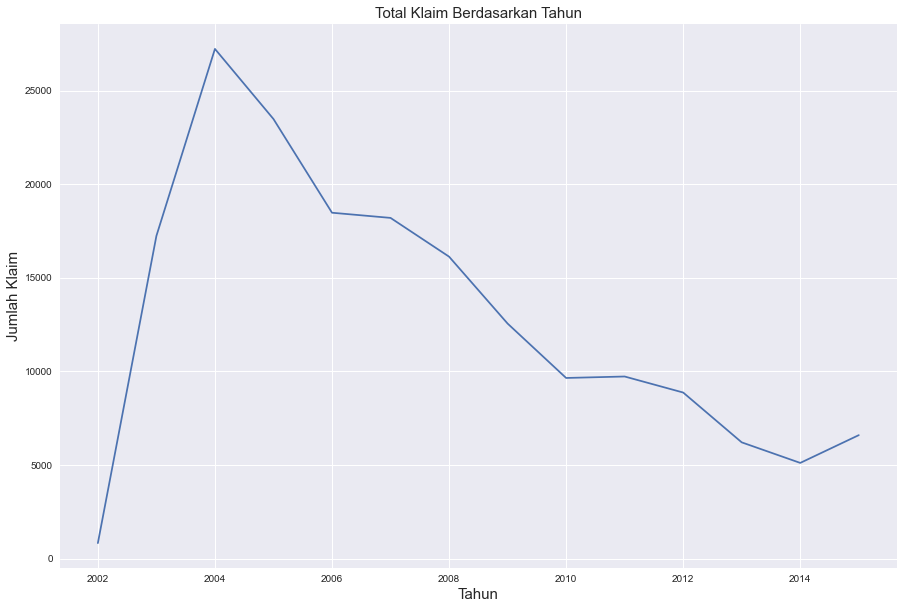

In [657]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df_claim_per_year, x='Year',y = 'Airport Code')
plt.title('Total Klaim Berdasarkan Tahun', size=15)
plt.xlabel('Tahun', size=15)
plt.ylabel('Jumlah Klaim', size=15)
plt.show()

Dari lineplot diatas bahwa tahun 2002 memiliki jumlah klaim paling sedikit, karena sedikit data yang tersedia pada data tahun tersebut. Akan tetapi ada lonjakan yang cukup signifikan di tahun 2004, dan jumlah klaim cenderung menurun setelah tahun 2004

## Bandara Yang menerima klaim paling banyak 

Setelah mengetahui jumlah klaim berdasarkan tahun, kita ingin mengetahui bandara dengan klaim paling banyak, karena unique value untuk bandara sangat banyak akan kita tampilkan top 10 untuk bandara dengan pengajuan klaim terbanyak

In [658]:
df_top_klaim_bandara = df[['Airport Code','Airport Name']].value_counts().head(10).to_frame().reset_index()
df_top_klaim_bandara


,Airport Code,Airport Name,0
0,LAX,Los Angeles International Airport,8864
1,JFK,John F. Kennedy International,8098
2,ORD,Chicago O'Hare International Airport,6369
3,EWR,Newark International Airport,6309
4,MCO,Orlando International Airport,5919
5,MIA,Miami International Airport,5729
6,ATL,Hartsfield-Jackson Atlanta International Airport,5285
7,SEA,Seattle-Tacoma International,5011
8,LAS,McCarran International,4785
9,PHX,Phoenix Sky Harbor International,4624


In [659]:
df_top_klaim_bandara.rename(columns = {0:'Frekuensi Klaim/Kasus'}, inplace = True)

In [660]:
df_top_klaim_bandara['Frekuensi Klaim/Kasus']

0    8864
1    8098
2    6369
3    6309
4    5919
5    5729
6    5285
7    5011
8    4785
9    4624
Name: Frekuensi Klaim/Kasus, dtype: int64

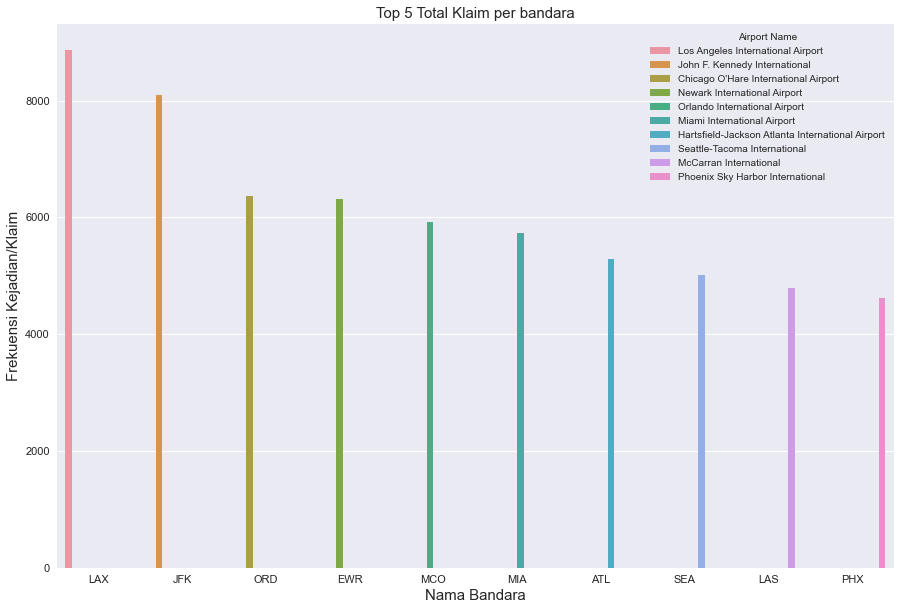

In [661]:
plt.figure(figsize=(15,10))
sns.barplot(data=df_top_klaim_bandara, x='Airport Code',y='Frekuensi Klaim/Kasus',hue='Airport Name')
plt.title('Top 5 Total Klaim per bandara', size=15)
plt.xticks(size=11)
plt.xlabel('Nama Bandara', size=15)
plt.yticks(size=11)
plt.ylabel('Frekuensi Kejadian/Klaim', size=15)
plt.show()

Dari Grafik di atas , kita dapatkan beberapa nama bandara di Amerika Serikat. Berdasarkan informasi yang dilansir dari https://www.worldatlas.com/articles/busiest-airports-in-united-states.html , nama nama bandara seperti Los Angeles International Airport (LAX) , JFK International Airport, merupakan salah satu bandara tersibuk di dunia. Maka dari itu terjelaskan mengapa pengajuan klaim di bandara tersebut sangat besar

Berdasarakan jumlah klaim per bandara, kita bisa mengulik juga jenis claim apa / `claim type` apa yang paling sering diajukan, akan kita tampilkan jumlah dan proporsi claim type sebagai berikut

## Claim Type yang paling sering diajukan

Kita akan tampilkan jumlah Claim Type berdasarkan tipe nya

In [662]:
df_proporsi_claim_type = df.groupby('Claim Type',as_index=False)['Claim Type'].value_counts()
df_proporsi_claim_type = df_proporsi_claim_type.sort_values(by='count',ascending=False)
df_proporsi_claim_type

,Claim Type,count
5,Passenger Property Loss,105943
8,Property Damage,66701
4,Other,5442
7,Personal Injury,1087
2,Employee Loss (MPCECA),454
6,Passenger Theft,446
3,Motor Vehicle,256
1,Complaint,14
9,Wrongful Death,3
0,Bus Terminal,1


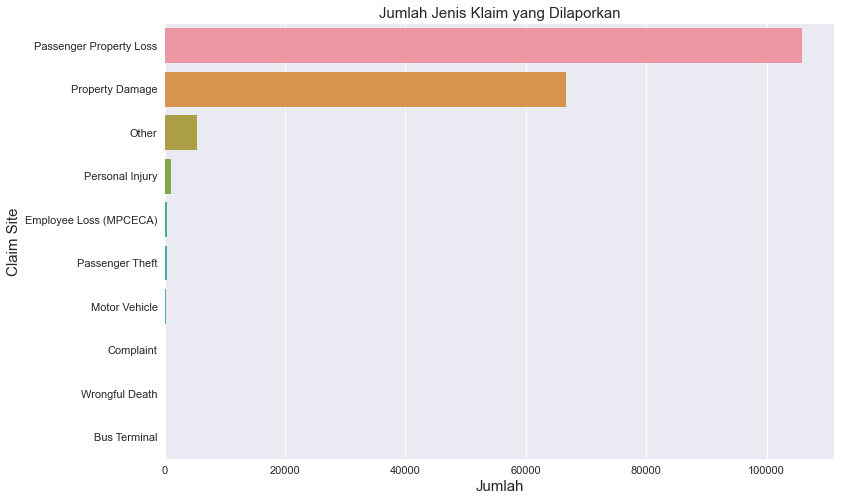

In [663]:
plt.figure(figsize=(12,8))
plt.title('Jumlah Jenis Klaim yang Dilaporkan',size=15) 
sns.barplot(data=df_proporsi_claim_type, x='count',y='Claim Type')
plt.xticks(size=11)
plt.xlabel('Jumlah', size=15)
plt.yticks(size=11)
plt.ylabel('Claim Site', size=15)
plt.show()

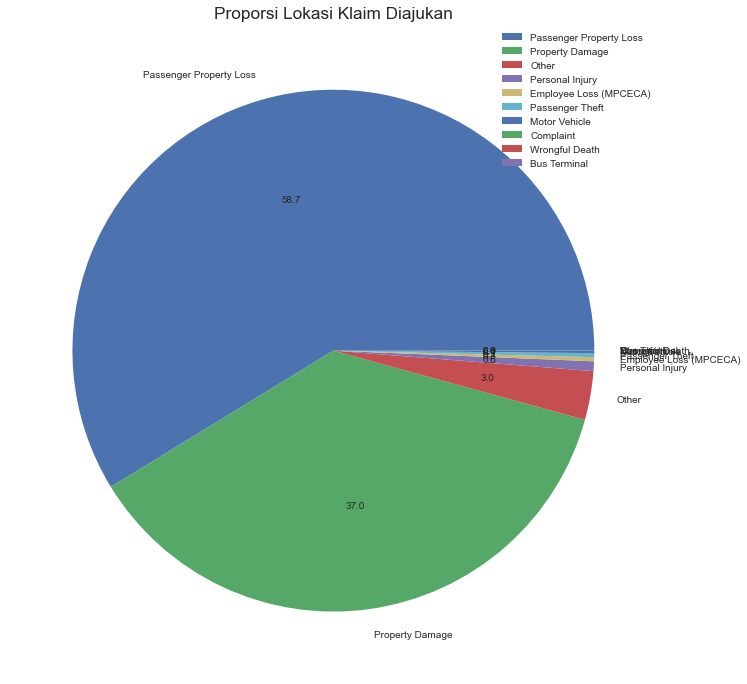

In [664]:
plt.style.use('seaborn')
plt.figure(figsize=(12,12))
plt.title('Proporsi Lokasi Klaim Diajukan', size='xx-large') 
plt.pie(df_proporsi_claim_type['count'], labels=df_proporsi_claim_type['Claim Type'], autopct='%.1f')
plt.legend()
plt.show()

In [665]:
df_proporsi_claim_site = df.groupby('Claim Site',as_index=False)['Claim Site'].value_counts()
df_proporsi_claim_site = df_proporsi_claim_site.sort_values(by='count',ascending=False)
df_proporsi_claim_site

,Claim Site,count
1,Checked Baggage,143274
2,Checkpoint,35087
4,Other,1661
3,Motor Vehicle,316
0,Bus Station,9


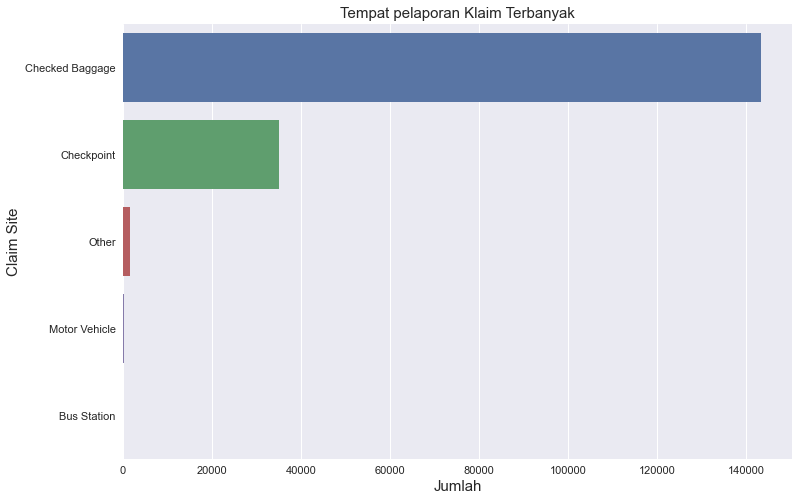

In [666]:
plt.figure(figsize=(12,8))
plt.title('Tempat pelaporan Klaim Terbanyak',size=15) 
sns.barplot(data=df_proporsi_claim_site, x='count',y='Claim Site')
plt.xticks(size=11)
plt.xlabel('Jumlah', size=15)
plt.yticks(size=11)
plt.ylabel('Claim Site', size=15)
plt.show()

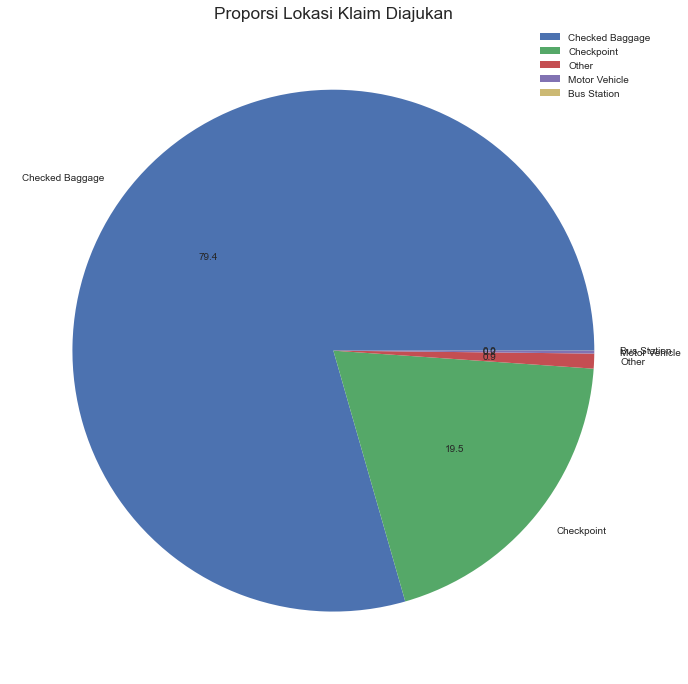

In [667]:
plt.style.use('seaborn')
plt.figure(figsize=(12,12))
plt.title('Proporsi Lokasi Klaim Diajukan', size='xx-large') 
plt.pie(df_proporsi_claim_site['count'], labels=df_proporsi_claim_site['Claim Site'], autopct='%.1f')
plt.legend()
plt.show()


Dari informasi di atas diketahui bahwa mayoritas tipe klaim yang diajukan kepada TSA berupa Passenger Property Loss dan Property Damage, masing-masing sebesar 58,9% dan 36,7%. Data ini mengindikasikan bahwa kebanyakkan klaim yang diajukan kepada TSA bersangkutan dengan barang-barang yang dibawa oleh penumpang. Dengan mayoritas lokasi titik pengaduan klaim berada di Checked Baggage dan Checkpoint, masing-masing sebesar 79% dan 19,8%.

Dari proporsi tersebut kita dapat menarik kesimpulan bahwa tingginya proporsi pengaduan klaim di titik Checked Baggage (Pengecekkan Bagasi) dan Checkpoint (Tempat pemeriksaan penumpang di bandara) disebabkan karena dua lokasi tersebut merupakan titik dengan tingkat aktivitas dan tingkat kepadatan yang cukup tinggi di sebuah bandara.

In [668]:
# Setelah mengetahui banyak laporan klaim kita ingin mengetahui di bandara apa saja jenis klaim sering terjadi

In [669]:
df_proporsi_claim_type = df.groupby('Airport Code')[['Claim Type']].value_counts()
df_proporsi_claim_type = df_proporsi_claim_type.loc[: , ['Property Damage', 'Passenger Property Loss']].sort_index().to_frame().reset_index()
df_proporsi_claim_type

,Airport Code,Claim Type,0
0,ABE,Passenger Property Loss,52
1,ABE,Property Damage,67
2,ABI,Passenger Property Loss,22
3,ABI,Property Damage,16
4,ABQ,Passenger Property Loss,480
...,...,...,...
851,YNG,Property Damage,9
852,YUM,Passenger Property Loss,20
853,YUM,Property Damage,6
854,ZZX,Passenger Property Loss,8


In [670]:
df_proporsi_claim_type['total'] = df_proporsi_claim_type.groupby('Airport Code').transform('sum')[0]
df_proporsi_claim_type = df_proporsi_claim_type.sort_values(['total', 'Airport Code'], ascending=False)
df_proporsi_claim_type

,Airport Code,Claim Type,0,total
458,LAX,Passenger Property Loss,5359,8397
459,LAX,Property Damage,3038,8397
432,JFK,Passenger Property Loss,5575,7820
433,JFK,Property Damage,2245,7820
598,ORD,Passenger Property Loss,3426,6103
...,...,...,...,...
141,CDR,Property Damage,1,1
115,BRL,Passenger Property Loss,1,1
92,BKW,Passenger Property Loss,1,1
25,AHN,Passenger Property Loss,1,1


Text(0, 0.5, 'Frequency')

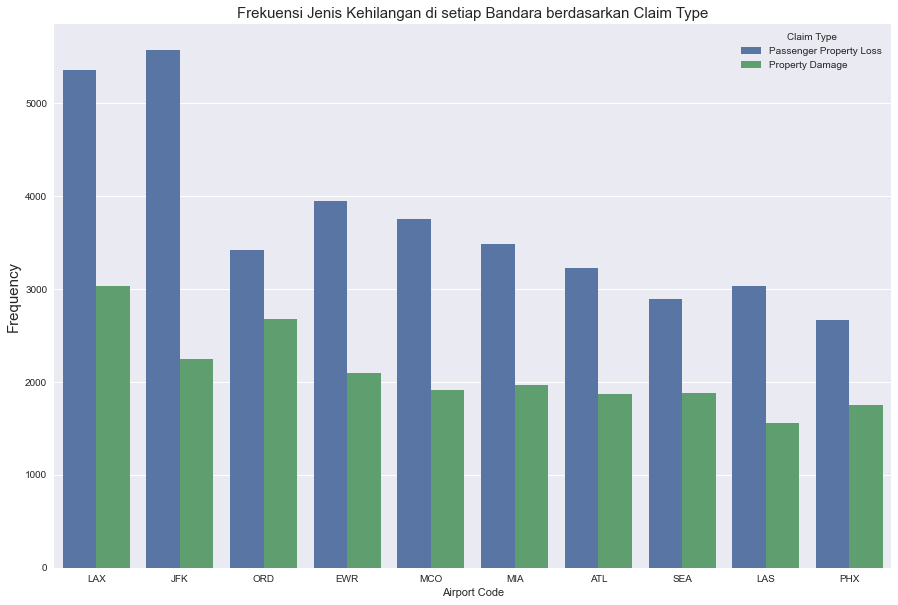

In [671]:
plt.figure(figsize=(15,10))
sns.barplot(data=df_proporsi_claim_type.head(20),x='Airport Code',y=0,hue='Claim Type')
plt.title('Frekuensi Jenis Kehilangan di setiap Bandara berdasarkan Claim Type',size=15)
plt.ylabel('Frequency',size=15)


Sama dengan informasi yang telah kita dapatkan dari barplot dan pie chart yang sebelumnya, pada bar chart di atas kita dapat melihat bahwa tipe klaim Passenger Property Loss dan Property Damage menjadi tipe klaim dengan proporsi terbanyak di 10 bandara dengan dengan total claim terbanyak.

In [672]:
df_proporsi_claim_site = df.groupby('Airline Name')[['Claim Site']].value_counts()
df_proporsi_claim_site = df_proporsi_claim_site.loc[: , ['Checked Baggage','Checkpoint']].sort_index().to_frame().reset_index()
df_proporsi_claim_site

,Airline Name,Claim Site,0
0,ATAAerocondor,Checked Baggage,265
1,ATAAerocondor,Checkpoint,55
2,AerLingus,Checked Baggage,65
3,AerLingus,Checkpoint,28
4,AeroCalifornia,Checked Baggage,3
...,...,...,...
381,WigginsAirways,Checked Baggage,1
382,XLAirways,Checked Baggage,1
383,XLAirways,Checkpoint,1
384,XtraAirways,Checked Baggage,7


In [673]:
df_proporsi_claim_site['total'] = df_proporsi_claim_site.groupby('Airline Name').transform('sum')[0]
df_proporsi_claim_site = df_proporsi_claim_site.sort_values(['total', 'Airline Name'], ascending=False)
df_proporsi_claim_site

,Airline Name,Claim Site,0,total
361,Undisclosed,Checked Baggage,19143,28985
362,Undisclosed,Checkpoint,9842,28985
151,DeltaAirLines,Checked Baggage,18824,22878
152,DeltaAirLines,Checkpoint,4054,22878
78,AmericanAirlines,Checked Baggage,17885,21437
...,...,...,...,...
26,AirAtlanticLtd,Checked Baggage,1,1
25,AirAtlantaIcelandic,Checked Baggage,1,1
24,AirAruba,Checked Baggage,1,1
23,AirAfrique,Checked Baggage,1,1


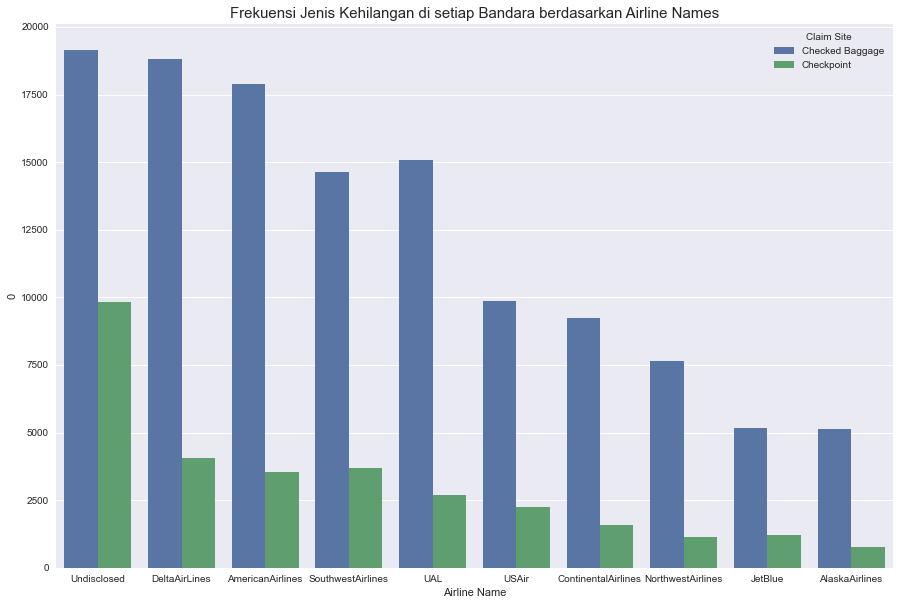

In [674]:
plt.figure(figsize=(15,10))
plt.title('Frekuensi Jenis Kehilangan di setiap Bandara berdasarkan Airline Names',size=15)
sns.barplot(data=df_proporsi_claim_site.head(20),x='Airline Name',y=0,hue='Claim Site');

Begitu juga dengan lokasi klaim Checked Baggage dan Checkpoint yang pada pie chart dan bar plot sebelumnya menjadi lokasi klaim dengan proporsi terbanyak , dari bar chart di atas kedua lokasi tersebut juga turut memiliki proporsi terbanyak di 10 bandara dengan dengan total claim terbanyak.

Namun hal menarik yang perlu diperhatikan adalah mengenai Checked Baggage. Karena selain ditangani oleh TSA, Checked Baggage juga ditangani oleh tiap maskapai penerbangan. Oleh karena itu kita akan mengecek maskapai penerbangan dengan laporan Checked Baggage cukup tinggi.

In [675]:
# 10 Maskapai dengan klaim Checked Baggage terbanyak

df_airline=pd.crosstab(df['Airline Name'],df['Claim Site'])
df_airline.sort_values('Checked Baggage',ascending=False)

Claim Site,Bus Station,Checked Baggage,Checkpoint,Motor Vehicle,Other
Airline Name,,,,,
Undisclosed,0,19143,9842,310,709
DeltaAirLines,0,18824,4054,0,148
AmericanAirlines,1,17885,3552,0,123
UAL,1,15073,2701,1,140
SouthwestAirlines,2,14648,3704,0,112
...,...,...,...,...,...
EstoniaAir,0,0,1,0,0
ViequesAir,0,0,1,0,0
ArikaIsrealiAirlines,0,0,1,0,1


In [676]:
df_airline.drop(columns=['Bus Station', 'Checkpoint', 'Motor Vehicle', 'Other'], inplace=True)

In [677]:
df_airline = df_airline.sort_values('Checked Baggage', ascending=False).head(10)
df_airline

Claim Site,Checked Baggage
Airline Name,
Undisclosed,19143
DeltaAirLines,18824
AmericanAirlines,17885
UAL,15073
SouthwestAirlines,14648
USAir,9862
ContinentalAirlines,9246
NorthwestAirlines,7652
JetBlue,5169


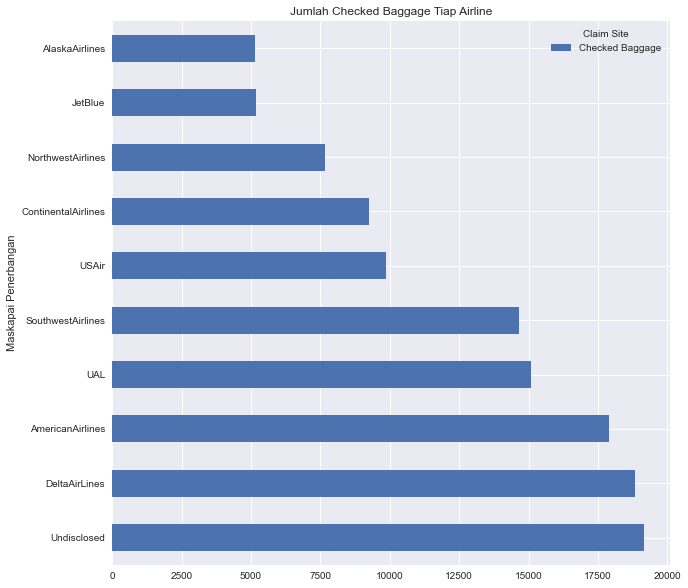

In [678]:
df_airline.plot(kind='barh',figsize=(10,10), title='Jumlah Checked Baggage Tiap Airline', xlabel='Maskapai Penerbangan', ylabel='Jumlah Klaim Checked Baggage')
plt.show()

Berdasarkan informasi yang dilansir dari https://today.yougov.com/ratings/travel/popularity/airlines/all , hampir seluruh maskapai yang masuk ke dalam grafik di atas merupakan maskapai dengan tingkat popularitas tertinggi di Amerika Serikat. Tingginya jumlah Checked Baggage bisa juga disebabkan karena maskapai-maskapai tersebut adalah maskapai yang paling sering digunakan oleh warga AS, maka belum tentu kelalaian yang menyebabkan klaim tersebut berasal dari TSA, namun bisa juga disebabkan oleh kelalaian dari maskapai itu sendiri.

## Harga rata-rata jenis barang yang di tanggung oleh TSA

In [679]:
df_item_status = df.groupby('Item')[['Close Amount']].mean().reset_index().sort_values(by='Close Amount',ascending=False)

In [680]:
df_item_status.head(10)

,Item,Close Amount
62,Hearing Aids,512.846607
15,Bicycles,446.062165
86,Musical Instruments,257.371730
33,Computer,237.695089
81,Medical Equipment & Insturments,190.397331
91,Others,177.138124
102,Professional Equipment,163.750636
67,Jewelry,158.836747
127,Watches,157.725828
12,Bathroom Scales,154.975000


In [681]:
df_item_status.tail(10)

,Item,Close Amount
93,Outdoor Structures,0.0
47,Drafting,0.0
48,Electric Blankets,0.0
98,Personal Navigation,0.0
57,Furs,0.0
1,Artificial flowers & Fruits,0.0
104,Rugs,0.0
71,Ladders,0.0
80,Material,0.0
113,Sunglasses,0.0


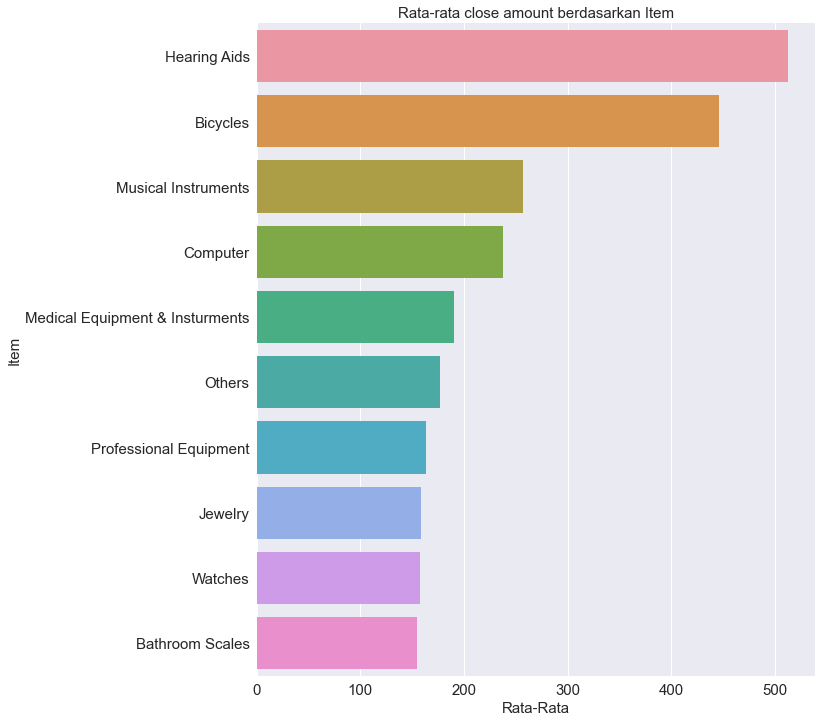

In [682]:
plt.figure(figsize=(10,12))
plt.title('Rata-rata close amount berdasarkan Item',size=15)
sns.barplot(data=df_item_status.head(10),x='Close Amount',y='Item')
plt.xlabel('Rata-Rata',size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('Item',size=15)
plt.show()

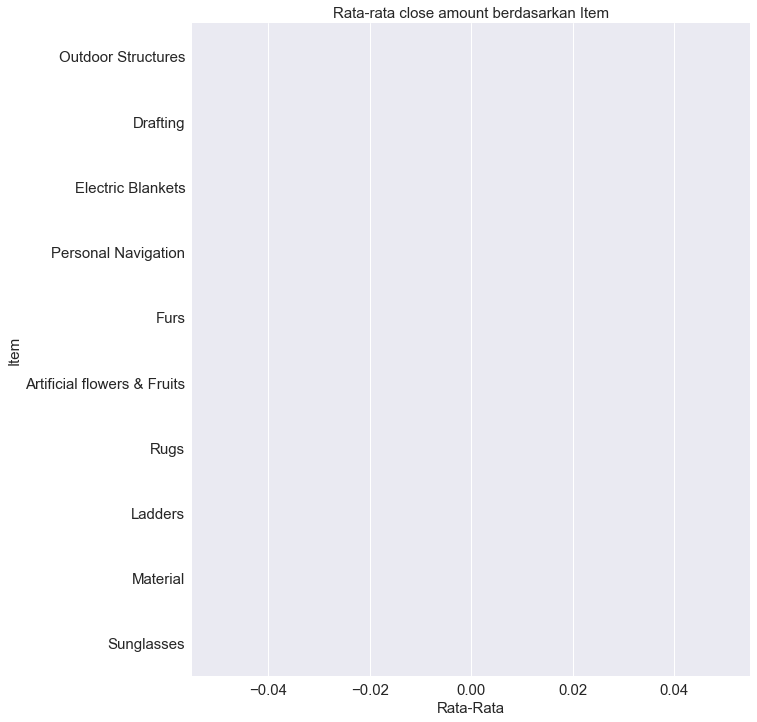

In [683]:
plt.figure(figsize=(10,12))
plt.title('Rata-rata close amount berdasarkan Item',size=15)
sns.barplot(data=df_item_status.tail(10),x='Close Amount',y='Item')
plt.xlabel('Rata-Rata',size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('Item',size=15)
plt.show()

Disini bisa kita dapatkan insight bahwa TSA cenderung menggantikan barang-barang dengan harga yang cukup mahal dan penting seperti alat bantu dengar, Sepeda, Alat musik, Alat-alat kesehatan, dan jam. Dibandingkan dengan barang-barang lain yang cenderung merupakan barang sehari-hari dengan rata-rata harga yang murah, dimana kemungkinan besar tidak ditanggung oleh TSA

Berdasarkan penjelasan harga barang diatas, kita punya asumsi bahwa Claim Amount dan Close Amount memiliki hubungan yang kuat, dimana akan kita buktikan dibawah ini

In [684]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180347 entries, 0 to 180346
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Claim Number   180347 non-null  object        
 1   Date Received  180347 non-null  datetime64[ns]
 2   Incident Date  180347 non-null  datetime64[ns]
 3   Airport Code   180347 non-null  object        
 4   Airport Name   180347 non-null  object        
 5   Airline Name   180347 non-null  object        
 6   Claim Type     180347 non-null  object        
 7   Claim Site     180347 non-null  object        
 8   Item           180347 non-null  object        
 9   Claim Amount   180347 non-null  float64       
 10  Status         180347 non-null  object        
 11  Close Amount   180347 non-null  float64       
 12  Disposition    180347 non-null  object        
 13  Year           180347 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(1), object(9

In [685]:
df.sort_values(by='Claim Amount',ascending=False)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Year
107676,2008012238289,2008-02-12,2007-12-28 00:00:00,JFK,John F. Kennedy International,Undisclosed,Personal Injury,Checkpoint,Others,3.000000e+12,Deny,0.0,Deny,2008
73631,2006032803795,2006-03-27,2004-06-01 00:00:00,PHX,Phoenix Sky Harbor International,Undisclosed,Personal Injury,Other,Others,5.000000e+09,Pending,0.0,Deny,2006
114186,2008063046385,2008-06-30,2007-04-25 00:00:00,OAK,Metropolitan Oakland International,AmericanAirlines,Personal Injury,Checkpoint,Others,1.000000e+09,Deny,0.0,Deny,2008
60381,2005080990257,2005-08-01,2005-06-13 00:00:00,PHX,Phoenix Sky Harbor International,SunCountryAirlinesInc,Personal Injury,Checkpoint,Medicines,1.250000e+08,Deny,0.0,Deny,2005
77023,2006060907675,2006-06-06,2006-04-19 00:00:00,LAX,Los Angeles International Airport,AmericaWest,Personal Injury,Checked Baggage,Currency,1.000000e+08,Deny,0.0,Deny,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155619,2012041192811,2012-03-19,2011-12-01 15:28:00,PIT,Pittsburgh International Airport,DeltaAirLines,Passenger Property Loss,Checked Baggage,Personal Electronics,0.000000e+00,Deny,0.0,Deny,2012
155618,2012041192810,2012-03-19,2012-03-11 12:08:00,PIT,Pittsburgh International Airport,SouthwestAirlines,Property Damage,Checked Baggage,Other,0.000000e+00,Deny,0.0,Deny,2012
137583,2010060372355,2010-05-25,2010-05-04 00:00:00,IND,Indianapolis International,SouthwestAirlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,0.000000e+00,Deny,0.0,Deny,2010
137584,2010060372357,2010-05-25,2010-05-06 14:00:00,IAD,Washington Dulles International,UAL,Passenger Property Loss,Checked Baggage,Clothing,0.000000e+00,Deny,0.0,Deny,2010


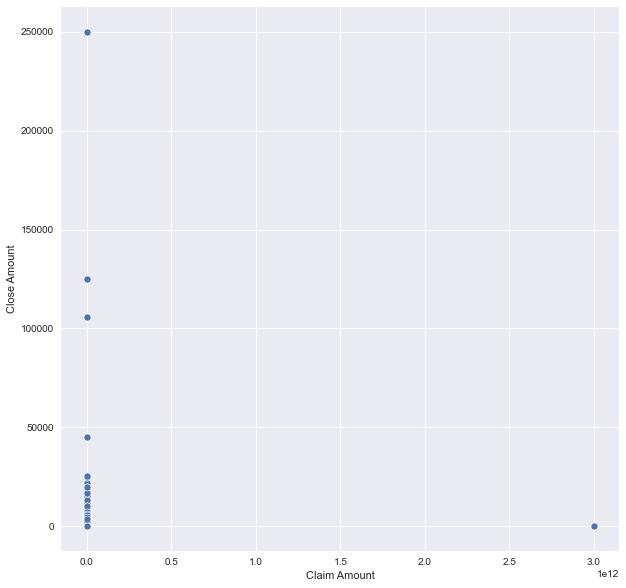

In [686]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df,x='Claim Amount',y='Close Amount')
plt.show()

Grafik diatas menggambarkan scatterplot klaim yang kita sorting berdasarkan nilai pengajuan dan nominal yang ditanggung oleh TSA.  Kita menemukan ada beberapa outlier yang cukup berdampak terhadap pembacaan persebaran data. Data Outlier tersebut juga menjelaskan bahwa barang-barang yang terlampau mahal harganya, atau bahkan merupakan sebuah kecelakaan/personal injury tidak mendapatkan pemberian klaim dari TSA. Akan tetapi outlier tersebut menghalangi kita untuk menganalisa persebaran data claim amount dan close amount dengan jelas, maka bisa kita drop data outlier tersbut supaya kita dapat melihat persebaran data dengan lebih baik. 

In [687]:
# Melihat Data dengan Close Amount Tertinggi
df.sort_values(by='Close Amount',ascending=False).head(20)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Year
2133,0221037L,2003-02-21,2003-01-08 00:00:00,LAS,McCarran International,SouthwestAirlines,Passenger Property Loss,Checked Baggage,Other,250000.00,Deny,250000.00,Deny,2003
51695,2007042424434,2005-03-25,2004-06-16 00:00:00,TSA,TSA - Non-Specified Airport,Undisclosed,Personal Injury,Motor Vehicle,Others,500000.00,Settle,125000.00,Settle,2005
15818,1117800M,2003-11-17,2003-08-24 00:00:00,HOU,William P. Hobby,Undisclosed,Personal Injury,Checkpoint,Others,495000.00,Settle,106000.00,Settle,2003
29741,2004070758620,2004-06-03,2004-04-02 00:00:00,F,Foreign airport,NorthwestAirlines,Passenger Property Loss,Other,Other,45178.00,Deny,45178.00,Deny,2004
172111,2014062714922,2014-06-27,2013-12-01 00:00:00,FWA,Ft. Wayne Municipal- Baer Field,Undisclosed,Property Damage,Checkpoint,Others,25483.44,Approved,25483.44,Approve in Full,2014
70026,2006012600385,2006-01-19,2005-11-07 00:00:00,BMI,Bloomington-Normal Airport,UAL,Personal Injury,Checkpoint,Others,60000.00,Settle,25000.00,Settle,2006
158869,2012110798436,2012-07-27,2011-12-30 17:30:00,DTW,Detroit Metropolitan Wayne County Airport,DeltaAirLines,Personal Injury,Other,Others,25000.00,Approved,25000.00,Approve in Full,2012
32790,2004080560658,2004-07-13,2002-08-05 00:00:00,JFK,John F. Kennedy International,Undisclosed,Personal Injury,Checkpoint,Others,2000000.00,Settle,25000.00,Settle,2004
36301,2004100664656,2004-09-01,2004-08-25 00:00:00,DEN,Denver International Airport,UAL,Passenger Property Loss,Checked Baggage,Jewelry,22000.00,Deny,22000.00,Deny,2004
168687,2013081205863,2014-04-24,2013-08-02 00:00:00,ZZX,Non TSA Airport (motor vehicle),Undisclosed,Personal Injury,Motor Vehicle,Others,20000.00,Approved,20000.00,Approve in Full,2014


In [688]:
# Menetapkan data yang diambil untuk mencegah outlier
df[df['Close Amount']< 25000.00]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Year
0,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,Other,Checkpoint,Clothing,75.00,Approved,75.00,Approve in Full,2002
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,Undisclosed,Property Damage,Checkpoint,Computer,2270.09,Deny,0.00,Deny,2002
2,2004102965797,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,Undisclosed,Passenger Property Loss,Checkpoint,Jewelry,4457.29,Deny,0.00,Deny,2002
3,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,AmericanAirlines,Other,Checkpoint,Eyeglasses,17.00,Approved,17.00,Approve in Full,2002
4,13334,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,Other,Other,Clothing,450.00,Deny,0.00,Deny,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180342,2015070223650,2015-06-29,2015-05-08,ZZX,Non TSA Airport (motor vehicle),Undisclosed,Employee Loss (MPCECA),Motor Vehicle,Others,250.00,Pending,0.00,Pending,2015
180343,2015092425588,2015-09-10,2015-08-31,ZZX,Non TSA Airport (motor vehicle),Undisclosed,Motor Vehicle,Other,Others,656.56,Pending,0.00,Pending,2015
180344,2015102026116,2015-09-29,2015-09-22,ZZX,Non TSA Airport (motor vehicle),Undisclosed,Motor Vehicle,Motor Vehicle,Others,1520.85,Pending,0.00,Pending,2015
180345,2015101326019,2015-10-13,2015-07-16,ZZX,Non TSA Airport (motor vehicle),Undisclosed,Motor Vehicle,Motor Vehicle,Others,643.32,Pending,0.00,Pending,2015


In [689]:
# Melihat Data dengan Claim Amount Tertinggi
df.sort_values(by='Claim Amount',ascending=False).head(20)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Year
107676,2008012238289,2008-02-12,2007-12-28 00:00:00,JFK,John F. Kennedy International,Undisclosed,Personal Injury,Checkpoint,Others,3.000000e+12,Deny,0.0,Deny,2008
73631,2006032803795,2006-03-27,2004-06-01 00:00:00,PHX,Phoenix Sky Harbor International,Undisclosed,Personal Injury,Other,Others,5.000000e+09,Pending,0.0,Deny,2006
114186,2008063046385,2008-06-30,2007-04-25 00:00:00,OAK,Metropolitan Oakland International,AmericanAirlines,Personal Injury,Checkpoint,Others,1.000000e+09,Deny,0.0,Deny,2008
60381,2005080990257,2005-08-01,2005-06-13 00:00:00,PHX,Phoenix Sky Harbor International,SunCountryAirlinesInc,Personal Injury,Checkpoint,Medicines,1.250000e+08,Deny,0.0,Deny,2005
77023,2006060907675,2006-06-06,2006-04-19 00:00:00,LAX,Los Angeles International Airport,AmericaWest,Personal Injury,Checked Baggage,Currency,1.000000e+08,Deny,0.0,Deny,2006
41030,2004122069372,2004-11-02,2004-09-23 00:00:00,OKC,Will Rogers World,AmericanAirlines,Personal Injury,Checkpoint,Others,2.722500e+07,Deny,0.0,Deny,2004
10639,0818500M,2003-08-18,2003-07-14 00:00:00,JFK,John F. Kennedy International,AmericanAirlines,Personal Injury,Checked Baggage,Other,2.000000e+07,Deny,0.0,Deny,2003
60754,2005090992326,2005-08-05,2003-08-09 00:00:00,MSP,Minneapolis/ St.Paul International Airport,NorthwestAirlines,Personal Injury,Checked Baggage,Others,1.000000e+07,Deny,0.0,Deny,2005
60899,2005080890217,2005-08-08,2003-08-09 00:00:00,MSP,Minneapolis/ St.Paul International Airport,NorthwestAirlines,Personal Injury,Checked Baggage,Others,1.000000e+07,Pending,0.0,Pending,2005
51328,2005030476943,2005-03-22,2003-12-06 00:00:00,IND,Indianapolis International,SouthwestAirlines,Personal Injury,Checkpoint,Others,1.000000e+07,Deny,0.0,Deny,2005


In [690]:
# Menetapkan data yang diambil untuk mencegah outlier
df[df['Claim Amount'] <1000]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Year
0,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,Other,Checkpoint,Clothing,75.00,Approved,75.0,Approve in Full,2002
3,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,AmericanAirlines,Other,Checkpoint,Eyeglasses,17.00,Approved,17.0,Approve in Full,2002
4,13334,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,Other,Other,Clothing,450.00,Deny,0.0,Deny,2002
5,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,AmericanAirlines,Other,Other,Luggage,200.00,Deny,0.0,Deny,2002
6,15324,2002-07-12,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Undisclosed,Other,Other,Luggage,50.00,Deny,0.0,Deny,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180340,2015052722774,2015-05-27,2015-04-29,ZZX,Non TSA Airport (motor vehicle),Undisclosed,Motor Vehicle,Motor Vehicle,Others,0.00,Deny,0.0,Deny,2015
180341,2015061123082,2015-06-02,2015-05-01,ZZX,Non TSA Airport (motor vehicle),Undisclosed,Property Damage,Motor Vehicle,Others,777.12,Pending,0.0,Pending,2015
180342,2015070223650,2015-06-29,2015-05-08,ZZX,Non TSA Airport (motor vehicle),Undisclosed,Employee Loss (MPCECA),Motor Vehicle,Others,250.00,Pending,0.0,Pending,2015
180343,2015092425588,2015-09-10,2015-08-31,ZZX,Non TSA Airport (motor vehicle),Undisclosed,Motor Vehicle,Other,Others,656.56,Pending,0.0,Pending,2015


In [691]:
claim_as_clean = df[(df['Claim Amount'] <1000) & (df['Close Amount']< 2500.00)]
claim_as_clean

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Year
0,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,Other,Checkpoint,Clothing,75.00,Approved,75.0,Approve in Full,2002
3,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,AmericanAirlines,Other,Checkpoint,Eyeglasses,17.00,Approved,17.0,Approve in Full,2002
4,13334,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,Other,Other,Clothing,450.00,Deny,0.0,Deny,2002
5,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,AmericanAirlines,Other,Other,Luggage,200.00,Deny,0.0,Deny,2002
6,15324,2002-07-12,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Undisclosed,Other,Other,Luggage,50.00,Deny,0.0,Deny,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180340,2015052722774,2015-05-27,2015-04-29,ZZX,Non TSA Airport (motor vehicle),Undisclosed,Motor Vehicle,Motor Vehicle,Others,0.00,Deny,0.0,Deny,2015
180341,2015061123082,2015-06-02,2015-05-01,ZZX,Non TSA Airport (motor vehicle),Undisclosed,Property Damage,Motor Vehicle,Others,777.12,Pending,0.0,Pending,2015
180342,2015070223650,2015-06-29,2015-05-08,ZZX,Non TSA Airport (motor vehicle),Undisclosed,Employee Loss (MPCECA),Motor Vehicle,Others,250.00,Pending,0.0,Pending,2015
180343,2015092425588,2015-09-10,2015-08-31,ZZX,Non TSA Airport (motor vehicle),Undisclosed,Motor Vehicle,Other,Others,656.56,Pending,0.0,Pending,2015


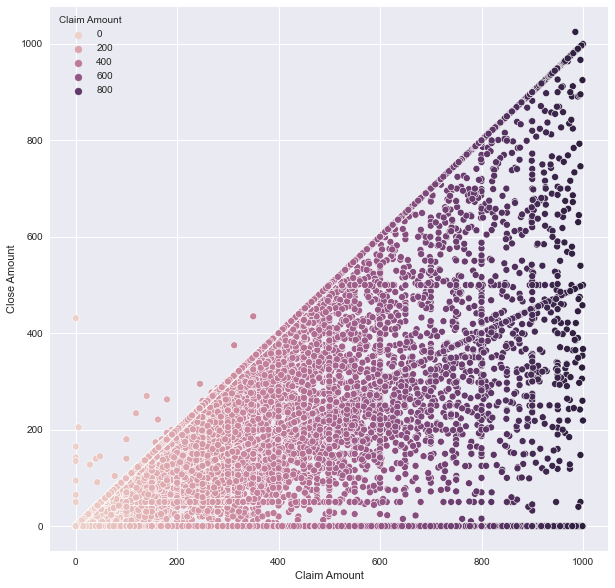

In [696]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=claim_as_clean,x='Claim Amount',y='Close Amount',hue='Claim Amount')
plt.show()

Dari scatterplot di atas kita dapat melihat bahwa claim amount dan close amount memiliki korelasi yang negatif dan juga rendah akan tetapi untuk mendukung analisa tersebut kita perlu melakukan uji korelasi antara kedua variabel.

In [ ]:
claim_as_clean.corr(method='spearman')

,Claim Amount,Close Amount,Year
Claim Amount,1.000000,0.280755,-0.376535
Close Amount,0.280755,1.000000,-0.410796
Year,-0.376535,-0.410796,1.000000


Setelah kita lakukan, uji korelasi, dapat kita simpulkan bahwa korelasi antara `Claim Amount` dan `Close Amount` sangat rendah dan bernilai negatif

## Kesimpulan 

Kesimpulan
Dari analisis yang telah dilakukan, kita dapat menarik beberapa kesimpulan mengenai bagaimana karekteristik data pengajuan klaim pada rentang tahun 2002-2015 sebagai berikut:

- Bandara LAX (Los Angeles International Airport) menjadi bandara dengan total klaim tertinggi, diikuti oleh Bandara JFK (John F. Kennedy International Airport) dan bandara ORD (Chicago O'Hare International Airport).

- Mayoritas bandara yang memiliki total klaim di atas rata-rata, termasuk ke dalam bandara-bandara tersibuk di Amerika Serikat.

- Tipe klaim Passenger Property Loss dan Property Damage menjadi tipe klaim dengan proporsi terbanyak. Kedua tipe klaim itu pun tetap menjadi yang terbanyak ketika dicek berdasarkan jumlah tiap tipe klaim di setiap bandara.

- Lokasi claim Checked Baggage dan Checkpoint menjadi lokasi klaim dengan proporsi terbanyak. Hal ini disebabkan karena kedua titik tersebut merupakan titik dengan tingkat aktivitas dan kepadatan tertinggi di suatu bandara. Namun perlu diperhatikan untuk Checked Baggage, maskapai penerbangan juga turut andil selama barang tersebut berada di dalam pesawat.

- Mayoritas maskapai yang memiliki jumlah klaim Checked Baggage terbanyak turut masuk ke dalam maskapai yang paling sering digunakan di Amerika Serikat

- Tahun 2002 menjadi tahun dengan data klaim terendah, dengan lonjakan cukup tinggi ada pada tahun 2004 dan total klaim cenderung menurun pada tahun-tahun berikutnya.

- TSA cenderung memberikan klaim terhadap barang-barang yang memiliki tingkat kemahalan yang **moderate**

## Rekomendasi atau Saran

Berikut adalah beberapa rekomendasi yang dapat diberikan berdasarkan kesimpulan di atas:

- TSA dapat menaingkatkan sistem keamanan serta personil keamanan untuk bandara-bandara yang termasuk ke dalam bandara dengan arus lalu lintas udara tersibuk di Amerika Serikat

- TSA perlu lebih memperhatikan serta meningkatkan keamanan dengan menambah petugas pada titik Checked Baggage dan Checkpoint di setiap bandara.

- TSA perlu menjalin kerjasama atau berkomunikasi mengenai keamanan barang-barang yang dibawa oleh penumpang dengan maskapai-maskapai yang terkait.

- Untuk beberapa barang yang tidak dibayarkan klaim nya oleh pihak TSA maupun bandara, TSA bisa melakukan kerjasama dengan badan asuransi tertentu, untuk meningkatkan rasa keselamatan dan kepuasan pelanggan, baik asuransi jiwa maupun barang.

In [ ]:
claim_as_clean.to_csv('TSA_CLAIMS_NO OUTLIERS.csv')